In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from matplotlib import pyplot

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 30)

In [20]:
data_train = pd.read_csv('C:/Users/katya/Fake_News/data_train.csv')
data_test = pd.read_csv('C:/Users/katya/Fake_News/data_test.csv') 

read_scores = pd.read_csv('C:/Users/katya/Fake_News/readability_scores.csv')
read_scores.test = pd.read_csv('C:/Users/katya/Fake_News/readability_scores_test.csv')

stopword_ft = pd.read_csv('C:/Users/katya/Fake_News/StopWord_Features.csv')
stopword_ft_test = pd.read_csv('C:/Users/katya/Fake_News/StopWord_Features_test.csv')

other_feat = pd.read_csv('C:/Users/katya/Fake_News/other_feat.csv')
other_feat_test = pd.read_csv('C:/Users/katya/Fake_News/other_feat_test.csv')

<ipython-input-20-082c2db2b062>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  read_scores.test = pd.read_csv('C:/Users/katya/Fake_News/readability_scores_test.csv')


In [64]:
train = pd.DataFrame()
#train['x'] = stopword_ft['stopword_count_ratio']
train['x_1'] = other_feat['Average_Sentence_Length']

train['y'] = stopword_ft['classify']

#1 True, 0 False
train['y'] = train['y'].replace({'T': 1})
train['y'] = train['y'].replace({'F': 0})

x_train = train.drop(['y'], axis = 1)
y_train = train['y']

In [65]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [66]:
Intercept=LR.intercept_
Coefficients=LR.coef_
print(Intercept)
print(Coefficients)

0.6927471767813844
[-0.0064008]


In [67]:
train

,x_1,y
0,27.102564,1
1,32.000000,1
2,28.000000,1
3,32.900000,1
4,35.500000,1
...,...,...
33812,27.800000,0
33813,31.266667,0
33814,36.454545,0
33815,23.047619,0


In [68]:
test = pd.DataFrame()
#test['x'] = stopword_ft_test['stopword_count_ratio']
test['x_1'] = other_feat_test['Average_Sentence_Length']

test['y'] = stopword_ft_test['classify']

#1 True, 0 False
test['y'] = test['y'].replace({'T': 1})
test['y'] = test['y'].replace({'F': 0})

x_test = test.drop(['y'], axis = 1)
y_test = test['y']

In [69]:
y_prediction = LR.predict(x_test)

In [70]:
y_prediction

array([0.56857172, 0.48045409, 0.50072328, ..., 0.56911074, 0.50609995,
       0.55810185])

In [71]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ' + str(score))
print('mean_sqrd_error is==' + str(mean_squared_error(y_test,y_prediction)))
print('root_mean_squared error of is==' + str(np.sqrt(mean_squared_error(y_test,y_prediction))))

r2 socre is -0.013766993349126011
mean_sqrd_error is==0.2452215023627133
root_mean_squared error of is==0.4951984474558794


In [72]:
#FOR LR
c = 0
for element in range(len(test['y'])):
    y_prediction = LR.predict(x_test)
    print('predict: ' + str(y_prediction[element].reshape(1,-1)))
    #print('x[element] 1: ' + str(((test.loc[element,'x']))))
    
    print('y[element]: ' + str((test['y'])[element]))

    value = (test['y'])[element]
    pred_value = (y_prediction[element].reshape(1,-1))[0][0]
    if ((pred_value <= 0.5) & (value == 0)):
        print('correct')
        c = c + 1
    elif ((pred_value >= 0.5) & (value == 1)):
        print('correct')
        c = c + 1
    else:
        print('wrong')
    print('********')

print('Correct: ' + str(c))
l = len(test['y'])
print((c/l)*100)

winsound.Beep(frequency, duration)

predict: [[0.56857172]]
y[element]: 1
correct
********
predict: [[0.48045409]]
y[element]: 1
wrong
********
predict: [[0.50072328]]
y[element]: 1
correct
********
predict: [[0.49512258]]
y[element]: 1
wrong
********
predict: [[0.5338474]]
y[element]: 1
correct
********
predict: [[0.53112706]]
y[element]: 1
correct
********
predict: [[0.52525967]]
y[element]: 1
correct
********
predict: [[0.42818092]]
y[element]: 1
wrong
********
predict: [[0.49615128]]
y[element]: 1
wrong
********
predict: [[0.55406325]]
y[element]: 1
correct
********
predict: [[0.51921447]]
y[element]: 1
correct
********
predict: [[0.54278566]]
y[element]: 1
correct
********
predict: [[0.54197286]]
y[element]: 1
correct
********
predict: [[0.52745602]]
y[element]: 1
correct
********
predict: [[0.51245807]]
y[element]: 1
correct
********
predict: [[0.47832049]]
y[element]: 1
wrong
********
predict: [[0.51608519]]
y[element]: 1
correct
********
predict: [[0.47832049]]
y[element]: 1
wrong
********
predict: [[0.56356746]]

predict: [[0.47512009]]
y[element]: 1
wrong
********
predict: [[0.52333943]]
y[element]: 1
correct
********
predict: [[0.4591181]]
y[element]: 1
wrong
********
predict: [[0.49272228]]
y[element]: 1
wrong
********
predict: [[0.51565847]]
y[element]: 1
correct
********
predict: [[0.49858968]]
y[element]: 1
wrong
********
predict: [[0.5025235]]
y[element]: 1
correct
********
predict: [[0.48152089]]
y[element]: 1
wrong
********
predict: [[0.55939725]]
y[element]: 1
correct
********
predict: [[0.51032447]]
y[element]: 1
correct
********
predict: [[0.54119891]]
y[element]: 1
correct
********
predict: [[0.52703767]]
y[element]: 1
correct
********
predict: [[0.58713403]]
y[element]: 1
correct
********
predict: [[0.50872428]]
y[element]: 1
correct
********
predict: [[0.51763967]]
y[element]: 1
correct
********
predict: [[0.52632647]]
y[element]: 1
correct
********
predict: [[0.5458198]]
y[element]: 1
correct
********
predict: [[0.53912806]]
y[element]: 1
correct
********
predict: [[0.51992567]]

predict: [[0.53119107]]
y[element]: 1
correct
********
predict: [[0.50499048]]
y[element]: 1
correct
********
predict: [[0.50925768]]
y[element]: 1
correct
********
predict: [[0.51814767]]
y[element]: 1
correct
********
predict: [[0.54908485]]
y[element]: 1
correct
********
predict: [[0.53312731]]
y[element]: 1
correct
********
predict: [[0.56405748]]
y[element]: 1
correct
********
predict: [[0.53912806]]
y[element]: 1
correct
********
predict: [[0.57753284]]
y[element]: 1
correct
********
predict: [[0.53912806]]
y[element]: 1
correct
********
predict: [[0.50285688]]
y[element]: 1
correct
********
predict: [[0.56793164]]
y[element]: 1
correct
********
predict: [[0.56656004]]
y[element]: 1
correct
********
predict: [[0.51818]]
y[element]: 1
correct
********
predict: [[0.55548565]]
y[element]: 1
correct
********
predict: [[0.49432248]]
y[element]: 1
wrong
********
predict: [[0.5330473]]
y[element]: 1
correct
********
predict: [[0.559069]]
y[element]: 1
correct
********
predict: [[0.51896

wrong
********
predict: [[0.57433244]]
y[element]: 1
correct
********
predict: [[0.50968439]]
y[element]: 1
correct
********
predict: [[0.56670072]]
y[element]: 1
correct
********
predict: [[0.55086285]]
y[element]: 1
correct
********
predict: [[0.61593762]]
y[element]: 1
correct
********
predict: [[0.56276177]]
y[element]: 1
correct
********
predict: [[0.56960804]]
y[element]: 1
correct
********
predict: [[0.54872925]]
y[element]: 1
correct
********
predict: [[0.53711638]]
y[element]: 1
correct
********
predict: [[0.50712408]]
y[element]: 1
correct
********
predict: [[0.50143448]]
y[element]: 1
correct
********
predict: [[0.49112208]]
y[element]: 1
wrong
********
predict: [[0.52568639]]
y[element]: 1
correct
********
predict: [[0.51401724]]
y[element]: 1
correct
********
predict: [[0.49374059]]
y[element]: 1
wrong
********
predict: [[0.49309156]]
y[element]: 1
wrong
********
predict: [[0.51725867]]
y[element]: 1
correct
********
predict: [[0.55166295]]
y[element]: 1
correct
********
p

predict: [[0.47329129]]
y[element]: 1
wrong
********
predict: [[0.5314471]]
y[element]: 1
correct
********
predict: [[0.54680902]]
y[element]: 1
correct
********
predict: [[0.49005529]]
y[element]: 1
wrong
********
predict: [[0.48458214]]
y[element]: 1
wrong
********
predict: [[0.48472129]]
y[element]: 1
wrong
********
predict: [[0.54712905]]
y[element]: 1
correct
********
predict: [[0.51032447]]
y[element]: 1
correct
********
predict: [[0.54449647]]
y[element]: 1
correct
********
predict: [[0.53460985]]
y[element]: 1
correct
********
predict: [[0.53628326]]
y[element]: 1
correct
********
predict: [[0.49161445]]
y[element]: 1
wrong
********
predict: [[0.54436507]]
y[element]: 1
correct
********
predict: [[0.48578809]]
y[element]: 1
wrong
********
predict: [[0.51725867]]
y[element]: 1
correct
********
predict: [[0.54472876]]
y[element]: 1
correct
********
predict: [[0.52480247]]
y[element]: 1
correct
********
predict: [[0.53724547]]
y[element]: 1
correct
********
predict: [[0.48792169]]

predict: [[0.49645608]]
y[element]: 1
wrong
********
predict: [[0.51139127]]
y[element]: 1
correct
********
predict: [[0.51876189]]
y[element]: 1
correct
********
predict: [[0.53752786]]
y[element]: 1
correct
********
predict: [[0.53232721]]
y[element]: 1
correct
********
predict: [[0.50214568]]
y[element]: 1
correct
********
predict: [[0.55268269]]
y[element]: 1
correct
********
predict: [[0.45079707]]
y[element]: 1
wrong
********
predict: [[0.53216249]]
y[element]: 1
correct
********
predict: [[0.53628326]]
y[element]: 1
correct
********
predict: [[0.50840424]]
y[element]: 1
correct
********
predict: [[0.48792169]]
y[element]: 1
wrong
********
predict: [[0.54187126]]
y[element]: 1
correct
********
predict: [[0.47832049]]
y[element]: 1
wrong
********
predict: [[0.52050756]]
y[element]: 1
correct
********
predict: [[0.50575248]]
y[element]: 1
correct
********
predict: [[0.50598108]]
y[element]: 1
correct
********
predict: [[0.52855283]]
y[element]: 1
correct
********
predict: [[0.53863

predict: [[0.56240368]]
y[element]: 1
correct
********
predict: [[0.55513005]]
y[element]: 1
correct
********
predict: [[0.52120583]]
y[element]: 1
correct
********
predict: [[0.52721547]]
y[element]: 1
correct
********
predict: [[0.57806624]]
y[element]: 1
correct
********
predict: [[0.49752288]]
y[element]: 1
wrong
********
predict: [[0.52205927]]
y[element]: 1
correct
********
predict: [[0.50232348]]
y[element]: 1
correct
********
predict: [[0.54738715]]
y[element]: 1
correct
********
predict: [[0.44738331]]
y[element]: 1
wrong
********
predict: [[0.5097244]]
y[element]: 1
correct
********
predict: [[0.55459665]]
y[element]: 1
correct
********
predict: [[0.5336001]]
y[element]: 1
correct
********
predict: [[0.50747968]]
y[element]: 1
correct
********
predict: [[0.50758128]]
y[element]: 1
correct
********
predict: [[0.49218888]]
y[element]: 1
wrong
********
predict: [[0.50200344]]
y[element]: 1
correct
********
predict: [[0.52675319]]
y[element]: 1
correct
********
predict: [[0.52052

predict: [[0.48685489]]
y[element]: 1
wrong
********
predict: [[0.48152089]]
y[element]: 1
wrong
********
predict: [[0.52108945]]
y[element]: 1
correct
********
predict: [[0.49592268]]
y[element]: 1
wrong
********
predict: [[0.51106303]]
y[element]: 1
correct
********
predict: [[0.52752662]]
y[element]: 1
correct
********
predict: [[0.5226337]]
y[element]: 1
correct
********
predict: [[0.55384989]]
y[element]: 1
correct
********
predict: [[0.53330915]]
y[element]: 1
correct
********
predict: [[0.52180826]]
y[element]: 1
correct
********
predict: [[0.4687193]]
y[element]: 1
wrong
********
predict: [[0.53628326]]
y[element]: 1
correct
********
predict: [[0.58153334]]
y[element]: 1
correct
********
predict: [[0.48456889]]
y[element]: 1
wrong
********
predict: [[0.54410646]]
y[element]: 1
correct
********
predict: [[0.53328385]]
y[element]: 1
correct
********
predict: [[0.51821879]]
y[element]: 1
correct
********
predict: [[0.40471133]]
y[element]: 1
wrong
********
predict: [[0.47672029]]


predict: [[0.50223926]]
y[element]: 1
correct
********
predict: [[0.53352736]]
y[element]: 1
correct
********
predict: [[0.48472129]]
y[element]: 1
wrong
********
predict: [[0.51139127]]
y[element]: 1
correct
********
predict: [[0.55238685]]
y[element]: 1
correct
********
predict: [[0.52780357]]
y[element]: 1
correct
********
predict: [[0.54659566]]
y[element]: 1
correct
********
predict: [[0.50925768]]
y[element]: 1
correct
********
predict: [[0.55192965]]
y[element]: 1
correct
********
predict: [[0.51169607]]
y[element]: 1
correct
********
predict: [[0.51106303]]
y[element]: 1
correct
********
predict: [[0.54945662]]
y[element]: 1
correct
********
predict: [[0.47938729]]
y[element]: 1
wrong
********
predict: [[0.43991571]]
y[element]: 1
wrong
********
predict: [[0.4995595]]
y[element]: 1
wrong
********
predict: [[0.54112831]]
y[element]: 1
correct
********
predict: [[0.53287966]]
y[element]: 1
correct
********
predict: [[0.56372059]]
y[element]: 1
correct
********
predict: [[0.545152

predict: [[0.54796725]]
y[element]: 1
correct
********
predict: [[0.53939476]]
y[element]: 1
correct
********
predict: [[0.56822259]]
y[element]: 1
correct
********
predict: [[0.50200344]]
y[element]: 1
correct
********
predict: [[0.5258144]]
y[element]: 1
correct
********
predict: [[0.53611592]]
y[element]: 1
correct
********
predict: [[0.44951691]]
y[element]: 1
wrong
********
predict: [[0.52449767]]
y[element]: 1
correct
********
predict: [[0.51725867]]
y[element]: 1
correct
********
predict: [[0.47955141]]
y[element]: 1
wrong
********
predict: [[0.50472378]]
y[element]: 1
correct
********
predict: [[0.4591181]]
y[element]: 1
wrong
********
predict: [[0.53592766]]
y[element]: 1
correct
********
predict: [[0.56083511]]
y[element]: 1
correct
********
predict: [[0.4695194]]
y[element]: 1
wrong
********
predict: [[0.49432248]]
y[element]: 1
wrong
********
predict: [[0.51323393]]
y[element]: 1
correct
********
predict: [[0.50339028]]
y[element]: 1
correct
********
predict: [[0.54232846]]

predict: [[0.25109221]]
y[element]: 1
wrong
********
predict: [[0.52419287]]
y[element]: 1
correct
********
predict: [[0.50392368]]
y[element]: 1
correct
********
predict: [[0.50346648]]
y[element]: 1
correct
********
predict: [[0.50392368]]
y[element]: 1
correct
********
predict: [[0.50819088]]
y[element]: 1
correct
********
predict: [[0.55042358]]
y[element]: 1
correct
********
predict: [[0.52035239]]
y[element]: 1
correct
********
predict: [[0.54552886]]
y[element]: 1
correct
********
predict: [[0.52979356]]
y[element]: 1
correct
********
predict: [[0.54176368]]
y[element]: 1
correct
********
predict: [[0.52341701]]
y[element]: 1
correct
********
predict: [[0.51401724]]
y[element]: 1
correct
********
predict: [[0.55673025]]
y[element]: 1
correct
********
predict: [[0.48960611]]
y[element]: 1
wrong
********
predict: [[0.52127321]]
y[element]: 1
correct
********
predict: [[0.53592766]]
y[element]: 1
correct
********
predict: [[0.56165886]]
y[element]: 1
correct
********
predict: [[0.4

predict: [[0.53044126]]
y[element]: 1
correct
********
predict: [[0.54004246]]
y[element]: 1
correct
********
predict: [[0.54522406]]
y[element]: 1
correct
********
predict: [[0.533712]]
y[element]: 1
correct
********
predict: [[0.52952686]]
y[element]: 1
correct
********
predict: [[0.53432746]]
y[element]: 1
correct
********
predict: [[0.54552886]]
y[element]: 1
correct
********
predict: [[0.51632522]]
y[element]: 1
correct
********
predict: [[0.54552886]]
y[element]: 1
correct
********
predict: [[0.48792169]]
y[element]: 1
wrong
********
predict: [[0.50413704]]
y[element]: 1
correct
********
predict: [[0.50152338]]
y[element]: 1
correct
********
predict: [[0.51624521]]
y[element]: 1
correct
********
predict: [[0.52205927]]
y[element]: 1
correct
********
predict: [[0.51377106]]
y[element]: 1
correct
********
predict: [[0.53272726]]
y[element]: 1
correct
********
predict: [[0.53817979]]
y[element]: 1
correct
********
predict: [[0.52664651]]
y[element]: 1
correct
********
predict: [[0.5

predict: [[0.51523175]]
y[element]: 1
correct
********
predict: [[0.53318446]]
y[element]: 1
correct
********
predict: [[0.51708087]]
y[element]: 1
correct
********
predict: [[0.5314471]]
y[element]: 1
correct
********
predict: [[0.50828786]]
y[element]: 1
correct
********
predict: [[0.50666688]]
y[element]: 1
correct
********
predict: [[0.55076587]]
y[element]: 1
correct
********
predict: [[0.50483808]]
y[element]: 1
correct
********
predict: [[0.50659068]]
y[element]: 1
correct
********
predict: [[0.48517849]]
y[element]: 1
wrong
********
predict: [[0.54936933]]
y[element]: 1
correct
********
predict: [[0.56046405]]
y[element]: 1
correct
********
predict: [[0.47063954]]
y[element]: 1
wrong
********
predict: [[0.51139127]]
y[element]: 1
correct
********
predict: [[0.4687193]]
y[element]: 1
wrong
********
predict: [[0.51832547]]
y[element]: 1
correct
********
predict: [[0.50996887]]
y[element]: 1
correct
********
predict: [[0.52941651]]
y[element]: 1
correct
********
predict: [[0.53016

predict: [[0.49112208]]
y[element]: 1
wrong
********
predict: [[0.49490437]]
y[element]: 1
wrong
********
predict: [[0.49176216]]
y[element]: 1
wrong
********
predict: [[0.55147245]]
y[element]: 1
correct
********
predict: [[0.54232846]]
y[element]: 1
correct
********
predict: [[0.53411874]]
y[element]: 1
correct
********
predict: [[0.53315398]]
y[element]: 1
correct
********
predict: [[0.54049966]]
y[element]: 1
correct
********
predict: [[0.54808917]]
y[element]: 1
correct
********
predict: [[0.52189515]]
y[element]: 1
correct
********
predict: [[0.56734975]]
y[element]: 1
correct
********
predict: [[0.54152836]]
y[element]: 1
correct
********
predict: [[0.49199492]]
y[element]: 1
wrong
********
predict: [[0.55951578]]
y[element]: 1
correct
********
predict: [[0.57539924]]
y[element]: 1
correct
********
predict: [[0.53592766]]
y[element]: 1
correct
********
predict: [[0.53272726]]
y[element]: 1
correct
********
predict: [[0.46822693]]
y[element]: 1
wrong
********
predict: [[0.5120313

predict: [[0.56046405]]
y[element]: 1
correct
********
predict: [[0.49645608]]
y[element]: 1
wrong
********
predict: [[0.52138871]]
y[element]: 1
correct
********
predict: [[0.5000832]]
y[element]: 1
correct
********
predict: [[0.51544511]]
y[element]: 1
correct
********
predict: [[0.51779207]]
y[element]: 1
correct
********
predict: [[0.50200344]]
y[element]: 1
correct
********
predict: [[0.51032447]]
y[element]: 1
correct
********
predict: [[0.54926265]]
y[element]: 1
correct
********
predict: [[0.51432497]]
y[element]: 1
correct
********
predict: [[0.51565847]]
y[element]: 1
correct
********
predict: [[0.59764963]]
y[element]: 1
correct
********
predict: [[0.52952686]]
y[element]: 1
correct
********
predict: [[0.55192965]]
y[element]: 1
correct
********
predict: [[0.51672527]]
y[element]: 1
correct
********
predict: [[0.51992567]]
y[element]: 1
correct
********
predict: [[0.53720782]]
y[element]: 1
correct
********
predict: [[0.53592766]]
y[element]: 1
correct
********
predict: [[0.

predict: [[0.47623328]]
y[element]: 1
wrong
********
predict: [[0.44439627]]
y[element]: 1
wrong
********
predict: [[0.55904165]]
y[element]: 1
correct
********
predict: [[0.54256263]]
y[element]: 1
correct
********
predict: [[0.45271731]]
y[element]: 1
wrong
********
predict: [[0.53112706]]
y[element]: 1
correct
********
predict: [[0.5503727]]
y[element]: 1
correct
********
predict: [[0.53006026]]
y[element]: 1
correct
********
predict: [[0.48152089]]
y[element]: 1
wrong
********
predict: [[0.44311611]]
y[element]: 1
wrong
********
predict: [[0.49157928]]
y[element]: 1
wrong
********
predict: [[0.48700729]]
y[element]: 1
wrong
********
predict: [[0.56633144]]
y[element]: 1
correct
********
predict: [[0.41751292]]
y[element]: 1
wrong
********
predict: [[0.46807922]]
y[element]: 1
wrong
********
predict: [[0.52992691]]
y[element]: 1
correct
********
predict: [[0.52525967]]
y[element]: 1
correct
********
predict: [[0.53592766]]
y[element]: 1
correct
********
predict: [[0.49240224]]
y[ele

predict: [[0.49781383]]
y[element]: 1
wrong
********
predict: [[0.52504631]]
y[element]: 1
correct
********
predict: [[0.48472129]]
y[element]: 1
wrong
********
predict: [[0.53171661]]
y[element]: 1
correct
********
predict: [[0.53821366]]
y[element]: 1
correct
********
predict: [[0.51585244]]
y[element]: 1
correct
********
predict: [[0.50996887]]
y[element]: 1
correct
********
predict: [[0.54168838]]
y[element]: 1
correct
********
predict: [[0.51007829]]
y[element]: 1
correct
********
predict: [[0.53912806]]
y[element]: 1
correct
********
predict: [[0.53976814]]
y[element]: 1
correct
********
predict: [[0.52091041]]
y[element]: 1
correct
********
predict: [[0.49218888]]
y[element]: 1
wrong
********
predict: [[0.51779207]]
y[element]: 1
correct
********
predict: [[0.50192343]]
y[element]: 1
correct
********
predict: [[0.55993065]]
y[element]: 1
correct
********
predict: [[0.50883096]]
y[element]: 1
correct
********
predict: [[0.55052948]]
y[element]: 1
correct
********
predict: [[0.527

predict: [[0.51392492]]
y[element]: 1
correct
********
predict: [[0.54861072]]
y[element]: 1
correct
********
predict: [[0.53652033]]
y[element]: 1
correct
********
predict: [[0.51283907]]
y[element]: 1
correct
********
predict: [[0.50405169]]
y[element]: 1
correct
********
predict: [[0.54598606]]
y[element]: 1
correct
********
predict: [[0.51992567]]
y[element]: 1
correct
********
predict: [[0.50021795]]
y[element]: 1
correct
********
predict: [[0.49678433]]
y[element]: 1
wrong
********
predict: [[0.50627064]]
y[element]: 1
correct
********
predict: [[0.51272477]]
y[element]: 1
correct
********
predict: [[0.49272228]]
y[element]: 1
wrong
********
predict: [[0.47329129]]
y[element]: 1
wrong
********
predict: [[0.50285688]]
y[element]: 1
correct
********
predict: [[0.43488652]]
y[element]: 1
wrong
********
predict: [[0.54644326]]
y[element]: 1
correct
********
predict: [[0.52888678]]
y[element]: 1
correct
********
predict: [[0.53272726]]
y[element]: 1
correct
********
predict: [[0.52829

predict: [[0.52091041]]
y[element]: 0
wrong
********
predict: [[0.43444406]]
y[element]: 0
correct
********
predict: [[0.55372188]]
y[element]: 0
wrong
********
predict: [[0.58606723]]
y[element]: 0
wrong
********
predict: [[0.54926265]]
y[element]: 0
wrong
********
predict: [[0.4584069]]
y[element]: 0
correct
********
predict: [[0.37430755]]
y[element]: 0
correct
********
predict: [[0.38085382]]
y[element]: 0
correct
********
predict: [[0.54135442]]
y[element]: 0
wrong
********
predict: [[0.46522795]]
y[element]: 0
correct
********
predict: [[0.56793164]]
y[element]: 0
wrong
********
predict: [[0.41111213]]
y[element]: 0
correct
********
predict: [[0.55455855]]
y[element]: 0
wrong
********
predict: [[0.51809687]]
y[element]: 0
wrong
********
predict: [[0.61913802]]
y[element]: 0
wrong
********
predict: [[0.46705983]]
y[element]: 0
correct
********
predict: [[0.54032821]]
y[element]: 0
wrong
********
predict: [[0.55251154]]
y[element]: 0
wrong
********
predict: [[0.35202785]]
y[element

predict: [[0.53400742]]
y[element]: 0
wrong
********
predict: [[0.45252905]]
y[element]: 0
correct
********
predict: [[0.52998406]]
y[element]: 0
wrong
********
predict: [[0.51592517]]
y[element]: 0
wrong
********
predict: [[0.46615898]]
y[element]: 0
correct
********
predict: [[0.62233841]]
y[element]: 0
wrong
********
predict: [[0.61593762]]
y[element]: 0
wrong
********
predict: [[0.53464014]]
y[element]: 0
wrong
********
predict: [[0.56153085]]
y[element]: 0
wrong
********
predict: [[0.54598606]]
y[element]: 0
wrong
********
predict: [[0.54111451]]
y[element]: 0
wrong
********
predict: [[0.56769747]]
y[element]: 0
wrong
********
predict: [[0.56899844]]
y[element]: 0
wrong
********
predict: [[0.46615898]]
y[element]: 0
correct
********
predict: [[0.4668905]]
y[element]: 0
correct
********
predict: [[0.56970964]]
y[element]: 0
wrong
********
predict: [[0.40968973]]
y[element]: 0
correct
********
predict: [[0.441639]]
y[element]: 0
correct
********
predict: [[0.58393364]]
y[element]: 0

predict: [[0.41511263]]
y[element]: 0
correct
********
predict: [[0.49678433]]
y[element]: 0
correct
********
predict: [[0.39973293]]
y[element]: 0
correct
********
predict: [[0.59033443]]
y[element]: 0
wrong
********
predict: [[0.43671531]]
y[element]: 0
correct
********
predict: [[0.41993485]]
y[element]: 0
correct
********
predict: [[0.52865403]]
y[element]: 0
wrong
********
predict: [[0.66287679]]
y[element]: 0
wrong
********
predict: [[0.58393364]]
y[element]: 0
wrong
********
predict: [[0.54187126]]
y[element]: 0
wrong
********
predict: [[0.32470137]]
y[element]: 0
correct
********
predict: [[0.59787823]]
y[element]: 0
wrong
********
predict: [[0.47255977]]
y[element]: 0
correct
********
predict: [[0.53912806]]
y[element]: 0
wrong
********
predict: [[0.58393364]]
y[element]: 0
wrong
********
predict: [[0.57113204]]
y[element]: 0
wrong
********
predict: [[0.51032447]]
y[element]: 0
wrong
********
predict: [[0.48365449]]
y[element]: 0
correct
********
predict: [[0.48595221]]
y[elem

predict: [[0.57578717]]
y[element]: 0
wrong
********
predict: [[0.67034439]]
y[element]: 0
wrong
********
predict: [[0.52114487]]
y[element]: 0
wrong
********
predict: [[0.56473125]]
y[element]: 0
wrong
********
predict: [[0.57586307]]
y[element]: 0
wrong
********
predict: [[0.38764254]]
y[element]: 0
correct
********
predict: [[0.58667683]]
y[element]: 0
wrong
********
predict: [[0.4687193]]
y[element]: 0
correct
********
predict: [[0.55993065]]
y[element]: 0
wrong
********
predict: [[0.51779207]]
y[element]: 0
wrong
********
predict: [[0.51912557]]
y[element]: 0
wrong
********
predict: [[0.4697861]]
y[element]: 0
correct
********
predict: [[0.50157672]]
y[element]: 0
wrong
********
predict: [[0.34230356]]
y[element]: 0
correct
********
predict: [[0.43031452]]
y[element]: 0
correct
********
predict: [[0.57252352]]
y[element]: 0
wrong
********
predict: [[0.50232348]]
y[element]: 0
wrong
********
predict: [[0.50712408]]
y[element]: 0
wrong
********
predict: [[0.68634638]]
y[element]: 0


predict: [[0.58393364]]
y[element]: 0
wrong
********
predict: [[0.49076649]]
y[element]: 0
correct
********
predict: [[0.63514001]]
y[element]: 0
wrong
********
predict: [[0.50001208]]
y[element]: 0
wrong
********
predict: [[0.41680172]]
y[element]: 0
correct
********
predict: [[0.44578311]]
y[element]: 0
correct
********
predict: [[0.56508685]]
y[element]: 0
wrong
********
predict: [[0.4607183]]
y[element]: 0
correct
********
predict: [[0.35403836]]
y[element]: 0
correct
********
predict: [[0.55774856]]
y[element]: 0
wrong
********
predict: [[0.57462339]]
y[element]: 0
wrong
********
predict: [[0.41751292]]
y[element]: 0
correct
********
predict: [[0.55363653]]
y[element]: 0
wrong
********
predict: [[0.56423888]]
y[element]: 0
wrong
********
predict: [[0.4559177]]
y[element]: 0
correct
********
predict: [[0.50409212]]
y[element]: 0
wrong
********
predict: [[0.39947432]]
y[element]: 0
correct
********
predict: [[0.49485588]]
y[element]: 0
correct
********
predict: [[0.54257464]]
y[elem

predict: [[0.39030954]]
y[element]: 0
correct
********
predict: [[0.48886995]]
y[element]: 0
correct
********
predict: [[0.53790886]]
y[element]: 0
wrong
********
predict: [[0.54727453]]
y[element]: 0
wrong
********
predict: [[0.51565847]]
y[element]: 0
wrong
********
predict: [[0.45093931]]
y[element]: 0
correct
********
predict: [[0.41591273]]
y[element]: 0
correct
********
predict: [[0.49257681]]
y[element]: 0
correct
********
predict: [[0.55833045]]
y[element]: 0
wrong
********
predict: [[0.39546574]]
y[element]: 0
correct
********
predict: [[0.45359014]]
y[element]: 0
correct
********
predict: [[0.63727361]]
y[element]: 0
wrong
********
predict: [[0.50200344]]
y[element]: 0
wrong
********
predict: [[0.47221064]]
y[element]: 0
correct
********
predict: [[0.53486086]]
y[element]: 0
wrong
********
predict: [[0.51051273]]
y[element]: 0
wrong
********
predict: [[0.57146893]]
y[element]: 0
wrong
********
predict: [[0.53832796]]
y[element]: 0
wrong
********
predict: [[0.58535603]]
y[elem

predict: [[0.51078167]]
y[element]: 0
wrong
********
predict: [[0.59193463]]
y[element]: 0
wrong
********
predict: [[0.57163407]]
y[element]: 0
wrong
********
predict: [[0.48232099]]
y[element]: 0
correct
********
predict: [[0.35350496]]
y[element]: 0
correct
********
predict: [[0.53223489]]
y[element]: 0
wrong
********
predict: [[0.53498637]]
y[element]: 0
wrong
********
predict: [[0.47167351]]
y[element]: 0
correct
********
predict: [[0.56186192]]
y[element]: 0
wrong
********
predict: [[0.53272726]]
y[element]: 0
wrong
********
predict: [[0.51565847]]
y[element]: 0
wrong
********
predict: [[0.67994558]]
y[element]: 0
wrong
********
predict: [[0.48387908]]
y[element]: 0
correct
********
predict: [[0.56880448]]
y[element]: 0
wrong
********
predict: [[0.4006381]]
y[element]: 0
correct
********
predict: [[0.55833045]]
y[element]: 0
wrong
********
predict: [[0.51592517]]
y[element]: 0
wrong
********
predict: [[0.4687193]]
y[element]: 0
correct
********
predict: [[0.50904432]]
y[element]: 

predict: [[0.51017207]]
y[element]: 0
wrong
********
predict: [[0.574164]]
y[element]: 0
wrong
********
predict: [[0.57936164]]
y[element]: 0
wrong
********
predict: [[0.33501377]]
y[element]: 0
correct
********
predict: [[0.50895288]]
y[element]: 0
wrong
********
predict: [[0.40215101]]
y[element]: 0
correct
********
predict: [[0.56322518]]
y[element]: 0
wrong
********
predict: [[0.4314783]]
y[element]: 0
correct
********
predict: [[0.48472129]]
y[element]: 0
correct
********
predict: [[0.35030456]]
y[element]: 0
correct
********
predict: [[0.36996415]]
y[element]: 0
correct
********
predict: [[0.44845011]]
y[element]: 0
correct
********
predict: [[0.55214301]]
y[element]: 0
wrong
********
predict: [[0.50072328]]
y[element]: 0
wrong
********
predict: [[0.54415726]]
y[element]: 0
wrong
********
predict: [[0.44567643]]
y[element]: 0
correct
********
predict: [[0.55808426]]
y[element]: 0
wrong
********
predict: [[0.46269502]]
y[element]: 0
correct
********
predict: [[0.51380317]]
y[eleme

predict: [[0.55682438]]
y[element]: 0
wrong
********
predict: [[0.49340808]]
y[element]: 0
correct
********
predict: [[0.58393364]]
y[element]: 0
wrong
********
predict: [[0.44768811]]
y[element]: 0
correct
********
predict: [[0.52771794]]
y[element]: 0
wrong
********
predict: [[0.43951566]]
y[element]: 0
correct
********
predict: [[0.68634638]]
y[element]: 0
wrong
********
predict: [[0.43173692]]
y[element]: 0
correct
********
predict: [[0.6479416]]
y[element]: 0
wrong
********
predict: [[0.52876486]]
y[element]: 0
wrong
********
predict: [[0.6479416]]
y[element]: 0
wrong
********
predict: [[0.51809687]]
y[element]: 0
wrong
********
predict: [[0.5340748]]
y[element]: 0
wrong
********
predict: [[0.44410085]]
y[element]: 0
correct
********
predict: [[0.50914538]]
y[element]: 0
wrong
********
predict: [[0.55192965]]
y[element]: 0
wrong
********
predict: [[0.33430257]]
y[element]: 0
correct
********
predict: [[0.52312607]]
y[element]: 0
wrong
********
predict: [[0.51691353]]
y[element]: 0

predict: [[0.52992691]]
y[element]: 0
wrong
********
predict: [[0.40013933]]
y[element]: 0
correct
********
predict: [[0.48472129]]
y[element]: 0
correct
********
predict: [[0.57889058]]
y[element]: 0
wrong
********
predict: [[0.58273349]]
y[element]: 0
wrong
********
predict: [[0.47888527]]
y[element]: 0
correct
********
predict: [[0.41650227]]
y[element]: 0
correct
********
predict: [[0.56571598]]
y[element]: 0
wrong
********
predict: [[0.46428798]]
y[element]: 0
correct
********
predict: [[0.56810009]]
y[element]: 0
wrong
********
predict: [[0.56322518]]
y[element]: 0
wrong
********
predict: [[0.50712408]]
y[element]: 0
wrong
********
predict: [[0.47832049]]
y[element]: 0
correct
********
predict: [[0.51245807]]
y[element]: 0
wrong
********
predict: [[0.29056379]]
y[element]: 0
correct
********
predict: [[0.60357746]]
y[element]: 0
wrong
********
predict: [[0.58674999]]
y[element]: 0
wrong
********
predict: [[0.54461446]]
y[element]: 0
wrong
********
predict: [[0.6479416]]
y[element

predict: [[0.50912433]]
y[element]: 0
wrong
********
predict: [[0.47448001]]
y[element]: 0
correct
********
predict: [[0.49858968]]
y[element]: 0
correct
********
predict: [[0.54788704]]
y[element]: 0
wrong
********
predict: [[0.50179008]]
y[element]: 0
wrong
********
predict: [[0.43951566]]
y[element]: 0
correct
********
predict: [[0.46053223]]
y[element]: 0
correct
********
predict: [[0.50712408]]
y[element]: 0
wrong
********
predict: [[0.57895524]]
y[element]: 0
wrong
********
predict: [[0.53032696]]
y[element]: 0
wrong
********
predict: [[0.58820083]]
y[element]: 0
wrong
********
predict: [[0.55673025]]
y[element]: 0
wrong
********
predict: [[0.62233841]]
y[element]: 0
wrong
********
predict: [[0.59731712]]
y[element]: 0
wrong
********
predict: [[0.50072328]]
y[element]: 0
wrong
********
predict: [[0.55101525]]
y[element]: 0
wrong
********
predict: [[0.57941543]]
y[element]: 0
wrong
********
predict: [[0.6447412]]
y[element]: 0
wrong
********
predict: [[0.59502835]]
y[element]: 0
w

predict: [[0.49183328]]
y[element]: 0
correct
********
predict: [[0.59833543]]
y[element]: 0
wrong
********
predict: [[0.5854397]]
y[element]: 0
wrong
********
predict: [[0.41797012]]
y[element]: 0
correct
********
predict: [[0.52232597]]
y[element]: 0
wrong
********
predict: [[0.38733774]]
y[element]: 0
correct
********
predict: [[0.39518819]]
y[element]: 0
correct
********
predict: [[0.45533581]]
y[element]: 0
correct
********
predict: [[0.54792915]]
y[element]: 0
wrong
********
predict: [[0.58655214]]
y[element]: 0
wrong
********
predict: [[0.50886975]]
y[element]: 0
wrong
********
predict: [[0.56153085]]
y[element]: 0
wrong
********
predict: [[0.47832049]]
y[element]: 0
correct
********
predict: [[0.54488878]]
y[element]: 0
wrong
********
predict: [[0.54552886]]
y[element]: 0
wrong
********
predict: [[0.50777722]]
y[element]: 0
wrong
********
predict: [[0.39190974]]
y[element]: 0
correct
********
predict: [[0.37615393]]
y[element]: 0
correct
********
predict: [[0.55246305]]
y[eleme

predict: [[0.43560748]]
y[element]: 0
correct
********
predict: [[0.55939725]]
y[element]: 0
wrong
********
predict: [[0.43762971]]
y[element]: 0
correct
********
predict: [[0.56296081]]
y[element]: 0
wrong
********
predict: [[0.49523688]]
y[element]: 0
correct
********
predict: [[0.47845964]]
y[element]: 0
correct
********
predict: [[0.40791173]]
y[element]: 0
correct
********
predict: [[0.54766245]]
y[element]: 0
wrong
********
predict: [[0.47383993]]
y[element]: 0
correct
********
predict: [[0.49464252]]
y[element]: 0
correct
********
predict: [[0.53046816]]
y[element]: 0
wrong
********
predict: [[0.53192716]]
y[element]: 0
wrong
********
predict: [[0.56913179]]
y[element]: 0
wrong
********
predict: [[0.4668905]]
y[element]: 0
correct
********
predict: [[0.53072701]]
y[element]: 0
wrong
********
predict: [[0.62553881]]
y[element]: 0
wrong
********
predict: [[0.51448499]]
y[element]: 0
wrong
********
predict: [[0.48365449]]
y[element]: 0
correct
********
predict: [[-0.30257669]]
y[el

predict: [[0.47329129]]
y[element]: 0
correct
********
predict: [[0.47213306]]
y[element]: 0
correct
********
predict: [[0.29829809]]
y[element]: 0
correct
********
predict: [[0.45527762]]
y[element]: 0
correct
********
predict: [[0.61593762]]
y[element]: 0
wrong
********
predict: [[0.49889448]]
y[element]: 0
correct
********
predict: [[0.52720933]]
y[element]: 0
wrong
********
predict: [[0.50346648]]
y[element]: 0
wrong
********
predict: [[0.33302241]]
y[element]: 0
correct
********
predict: [[0.4687193]]
y[element]: 0
correct
********
predict: [[0.39119854]]
y[element]: 0
correct
********
predict: [[0.50712408]]
y[element]: 0
wrong
********
predict: [[0.44645566]]
y[element]: 0
correct
********
predict: [[0.57211678]]
y[element]: 0
wrong
********
predict: [[0.53166046]]
y[element]: 0
wrong
********
predict: [[0.55871838]]
y[element]: 0
wrong
********
predict: [[0.25621285]]
y[element]: 0
correct
********
predict: [[0.37270735]]
y[element]: 0
correct
********
predict: [[0.49712283]]
y

predict: [[0.40791173]]
y[element]: 0
correct
********
predict: [[0.52783254]]
y[element]: 0
wrong
********
predict: [[0.59168197]]
y[element]: 0
wrong
********
predict: [[0.54126166]]
y[element]: 0
wrong
********
predict: [[0.50819088]]
y[element]: 0
wrong
********
predict: [[0.51416495]]
y[element]: 0
wrong
********
predict: [[0.54756547]]
y[element]: 0
wrong
********
predict: [[0.44951691]]
y[element]: 0
correct
********
predict: [[0.47640025]]
y[element]: 0
correct
********
predict: [[0.56419785]]
y[element]: 0
wrong
********
predict: [[0.62873921]]
y[element]: 0
wrong
********
predict: [[0.46576508]]
y[element]: 0
correct
********
predict: [[0.63300641]]
y[element]: 0
wrong
********
predict: [[0.55897053]]
y[element]: 0
wrong
********
predict: [[0.54360862]]
y[element]: 0
wrong
********
predict: [[0.60313602]]
y[element]: 0
wrong
********
predict: [[0.49737048]]
y[element]: 0
correct
********
predict: [[0.40471133]]
y[element]: 0
correct
********
predict: [[0.56473125]]
y[element]

predict: [[0.50341835]]
y[element]: 0
wrong
********
predict: [[0.44098251]]
y[element]: 0
correct
********
predict: [[0.35167616]]
y[element]: 0
correct
********
predict: [[0.50072328]]
y[element]: 0
wrong
********
predict: [[0.54461446]]
y[element]: 0
wrong
********
predict: [[0.63834041]]
y[element]: 0
wrong
********
predict: [[0.51672527]]
y[element]: 0
wrong
********
predict: [[0.56708943]]
y[element]: 0
wrong
********
predict: [[0.35990576]]
y[element]: 0
correct
********
predict: [[0.43511512]]
y[element]: 0
correct
********
predict: [[0.51547294]]
y[element]: 0
wrong
********
predict: [[0.42117052]]
y[element]: 0
correct
********
predict: [[0.57468804]]
y[element]: 0
wrong
********
predict: [[0.58196416]]
y[element]: 0
wrong
********
predict: [[0.58790654]]
y[element]: 0
wrong
********
predict: [[0.5508001]]
y[element]: 0
wrong
********
predict: [[0.60579001]]
y[element]: 0
wrong
********
predict: [[0.37142719]]
y[element]: 0
correct
********
predict: [[0.56729156]]
y[element]:

predict: [[0.51928559]]
y[element]: 0
wrong
********
predict: [[0.58858876]]
y[element]: 0
wrong
********
predict: [[0.45332279]]
y[element]: 0
correct
********
predict: [[0.4719197]]
y[element]: 0
correct
********
predict: [[0.48992194]]
y[element]: 0
correct
********
predict: [[0.47786329]]
y[element]: 0
correct
********
predict: [[0.5041237]]
y[element]: 0
wrong
********
predict: [[0.59753533]]
y[element]: 0
wrong
********
predict: [[0.50958592]]
y[element]: 0
wrong
********
predict: [[0.43904288]]
y[element]: 0
correct
********
predict: [[0.34419471]]
y[element]: 0
correct
********
predict: [[0.49752288]]
y[element]: 0
correct
********
predict: [[0.49024925]]
y[element]: 0
correct
********
predict: [[0.56473125]]
y[element]: 0
wrong
********
predict: [[0.49112208]]
y[element]: 0
correct
********
predict: [[0.52419287]]
y[element]: 0
wrong
********
predict: [[0.55086285]]
y[element]: 0
wrong
********
predict: [[0.50373542]]
y[element]: 0
wrong
********
predict: [[0.4616073]]
y[eleme

predict: [[0.23188982]]
y[element]: 0
correct
********
predict: [[0.55535865]]
y[element]: 0
wrong
********
predict: [[0.51480503]]
y[element]: 0
wrong
********
predict: [[0.63834041]]
y[element]: 0
wrong
********
predict: [[0.559069]]
y[element]: 0
wrong
********
predict: [[0.5369124]]
y[element]: 0
wrong
********
predict: [[0.18004337]]
y[element]: 0
correct
********
predict: [[0.53312731]]
y[element]: 0
wrong
********
predict: [[0.41911312]]
y[element]: 0
correct
********
predict: [[0.43031452]]
y[element]: 0
correct
********
predict: [[0.39254982]]
y[element]: 0
correct
********
predict: [[0.56793164]]
y[element]: 0
wrong
********
predict: [[0.23402342]]
y[element]: 0
correct
********
predict: [[0.59267619]]
y[element]: 0
wrong
********
predict: [[0.56372059]]
y[element]: 0
wrong
********
predict: [[0.55726365]]
y[element]: 0
wrong
********
predict: [[0.42299932]]
y[element]: 0
correct
********
predict: [[0.35830556]]
y[element]: 0
correct
********
predict: [[0.43031452]]
y[element

predict: [[0.50758128]]
y[element]: 0
wrong
********
predict: [[0.54065206]]
y[element]: 0
wrong
********
predict: [[0.59246803]]
y[element]: 0
wrong
********
predict: [[0.60233593]]
y[element]: 0
wrong
********
predict: [[0.44711661]]
y[element]: 0
correct
********
predict: [[0.56899844]]
y[element]: 0
wrong
********
predict: [[0.57539924]]
y[element]: 0
wrong
********
predict: [[0.0942727]]
y[element]: 0
correct
********
predict: [[0.5051546]]
y[element]: 0
wrong
********
predict: [[0.55086285]]
y[element]: 0
wrong
********
predict: [[0.43770005]]
y[element]: 0
correct
********
predict: [[0.52232597]]
y[element]: 0
wrong
********
predict: [[0.42071332]]
y[element]: 0
correct
********
predict: [[0.48490955]]
y[element]: 0
correct
********
predict: [[0.43031452]]
y[element]: 0
correct
********
predict: [[0.27285492]]
y[element]: 0
correct
********
predict: [[0.41879308]]
y[element]: 0
correct
********
predict: [[0.50872428]]
y[element]: 0
wrong
********
predict: [[0.56742632]]
y[elemen

predict: [[0.58180004]]
y[element]: 0
wrong
********
predict: [[0.5563302]]
y[element]: 0
wrong
********
predict: [[0.55340676]]
y[element]: 0
wrong
********
predict: [[0.51061542]]
y[element]: 0
wrong
********
predict: [[0.19241825]]
y[element]: 0
correct
********
predict: [[0.44695659]]
y[element]: 0
correct
********
predict: [[0.39190974]]
y[element]: 0
correct
********
predict: [[0.54632896]]
y[element]: 0
wrong
********
predict: [[0.43287484]]
y[element]: 0
correct
********
predict: [[0.55238685]]
y[element]: 0
wrong
********
predict: [[0.51352487]]
y[element]: 0
wrong
********
predict: [[0.60847002]]
y[element]: 0
wrong
********
predict: [[0.68634638]]
y[element]: 0
wrong
********
predict: [[0.47912059]]
y[element]: 0
correct
********
predict: [[0.4651633]]
y[element]: 0
correct
********
predict: [[0.47985112]]
y[element]: 0
correct
********
predict: [[0.60740322]]
y[element]: 0
wrong
********
predict: [[0.47832049]]
y[element]: 0
correct
********
predict: [[0.51565847]]
y[elemen

predict: [[0.50895288]]
y[element]: 0
wrong
********
predict: [[0.4601849]]
y[element]: 0
correct
********
predict: [[0.4651633]]
y[element]: 0
correct
********
predict: [[0.43762971]]
y[element]: 0
correct
********
predict: [[0.54741144]]
y[element]: 0
wrong
********
predict: [[0.45634442]]
y[element]: 0
correct
********
predict: [[0.39447006]]
y[element]: 0
correct
********
predict: [[0.4559177]]
y[element]: 0
correct
********
predict: [[0.53939476]]
y[element]: 0
wrong
********
predict: [[-0.19376315]]
y[element]: 0
correct
********
predict: [[0.54827205]]
y[element]: 0
wrong
********
predict: [[0.41879308]]
y[element]: 0
correct
********
predict: [[0.46034902]]
y[element]: 0
correct
********
predict: [[0.39831053]]
y[element]: 0
correct
********
predict: [[0.4583561]]
y[element]: 0
correct
********
predict: [[0.50486497]]
y[element]: 0
wrong
********
predict: [[0.55417858]]
y[element]: 0
wrong
********
predict: [[0.64282096]]
y[element]: 0
wrong
********
predict: [[0.49346904]]
y[e

predict: [[0.4722753]]
y[element]: 0
correct
********
predict: [[0.578813]]
y[element]: 0
wrong
********
predict: [[0.47747828]]
y[element]: 0
correct
********
predict: [[0.53089846]]
y[element]: 0
wrong
********
predict: [[0.63898049]]
y[element]: 0
wrong
********
predict: [[0.53733584]]
y[element]: 0
wrong
********
predict: [[0.52371873]]
y[element]: 0
wrong
********
predict: [[0.02226374]]
y[element]: 0
correct
********
predict: [[0.59534375]]
y[element]: 0
wrong
********
predict: [[0.51619187]]
y[element]: 0
wrong
********
predict: [[0.50139705]]
y[element]: 0
wrong
********
predict: [[0.54352861]]
y[element]: 0
wrong
********
predict: [[0.59033443]]
y[element]: 0
wrong
********
predict: [[0.38230854]]
y[element]: 0
correct
********
predict: [[0.62752825]]
y[element]: 0
wrong
********
predict: [[0.55673025]]
y[element]: 0
wrong
********
predict: [[0.59297005]]
y[element]: 0
wrong
********
predict: [[0.53930586]]
y[element]: 0
wrong
********
predict: [[0.50663171]]
y[element]: 0
wro

predict: [[0.38550894]]
y[element]: 0
correct
********
predict: [[0.48392119]]
y[element]: 0
correct
********
predict: [[0.56153085]]
y[element]: 0
wrong
********
predict: [[0.4548509]]
y[element]: 0
correct
********
predict: [[0.21268743]]
y[element]: 0
correct
********
predict: [[0.2750952]]
y[element]: 0
correct
********
predict: [[0.34550396]]
y[element]: 0
correct
********
predict: [[0.49615128]]
y[element]: 0
correct
********
predict: [[0.47420569]]
y[element]: 0
correct
********
predict: [[0.5314471]]
y[element]: 0
wrong
********
predict: [[0.60953682]]
y[element]: 0
wrong
********
predict: [[0.47938729]]
y[element]: 0
correct
********
predict: [[0.61273722]]
y[element]: 0
wrong
********
predict: [[0.4337611]]
y[element]: 0
correct
********
predict: [[0.60953682]]
y[element]: 0
wrong
********
predict: [[0.51192467]]
y[element]: 0
wrong
********
predict: [[0.55406325]]
y[element]: 0
wrong
********
predict: [[0.48152089]]
y[element]: 0
correct
********
predict: [[0.42940012]]
y[el

predict: [[0.48509057]]
y[element]: 0
correct
********
predict: [[0.53003219]]
y[element]: 0
wrong
********
predict: [[0.55785632]]
y[element]: 0
wrong
********
predict: [[0.40013933]]
y[element]: 0
correct
********
predict: [[0.5035926]]
y[element]: 0
wrong
********
predict: [[0.47778709]]
y[element]: 0
correct
********
predict: [[0.49455108]]
y[element]: 0
correct
********
predict: [[0.55010085]]
y[element]: 0
wrong
********
predict: [[0.57641966]]
y[element]: 0
wrong
********
predict: [[0.50352363]]
y[element]: 0
wrong
********
predict: [[0.44391621]]
y[element]: 0
correct
********
predict: [[0.5130325]]
y[element]: 0
wrong
********
predict: [[0.50179008]]
y[element]: 0
wrong
********
predict: [[0.62297849]]
y[element]: 0
wrong
********
predict: [[0.44151591]]
y[element]: 0
correct
********
predict: [[0.49076649]]
y[element]: 0
correct
********
predict: [[0.60014899]]
y[element]: 0
wrong
********
predict: [[0.51565847]]
y[element]: 0
wrong
********
predict: [[0.49352238]]
y[element]

predict: [[0.53814332]]
y[element]: 0
wrong
********
predict: [[0.51621995]]
y[element]: 0
wrong
********
predict: [[0.56153085]]
y[element]: 0
wrong
********
predict: [[0.60633642]]
y[element]: 0
wrong
********
predict: [[0.53197423]]
y[element]: 0
wrong
********
predict: [[0.271209]]
y[element]: 0
correct
********
predict: [[0.59863176]]
y[element]: 0
wrong
********
predict: [[0.53656774]]
y[element]: 0
wrong
********
predict: [[0.43962477]]
y[element]: 0
correct
********
predict: [[0.34710416]]
y[element]: 0
correct
********
predict: [[0.49560264]]
y[element]: 0
correct
********
predict: [[0.52952686]]
y[element]: 0
wrong
********
predict: [[0.52571687]]
y[element]: 0
wrong
********
predict: [[0.55967799]]
y[element]: 0
wrong
********
predict: [[0.49959373]]
y[element]: 0
correct
********
predict: [[0.45165051]]
y[element]: 0
correct
********
predict: [[0.55558725]]
y[element]: 0
wrong
********
predict: [[0.52435699]]
y[element]: 0
wrong
********
predict: [[0.53166046]]
y[element]: 

predict: [[0.49798008]]
y[element]: 0
correct
********
predict: [[-0.06681402]]
y[element]: 0
correct
********
predict: [[0.56081965]]
y[element]: 0
wrong
********
predict: [[0.48152089]]
y[element]: 0
correct
********
predict: [[0.4678049]]
y[element]: 0
correct
********
predict: [[0.52541207]]
y[element]: 0
wrong
********
predict: [[0.4701964]]
y[element]: 0
correct
********
predict: [[0.4703195]]
y[element]: 0
correct
********
predict: [[0.37526767]]
y[element]: 0
correct
********
predict: [[0.53303206]]
y[element]: 0
wrong
********
predict: [[0.40745453]]
y[element]: 0
correct
********
predict: [[0.49477968]]
y[element]: 0
correct
********
predict: [[0.51672527]]
y[element]: 0
wrong
********
predict: [[0.41271233]]
y[element]: 0
correct
********
predict: [[0.62553881]]
y[element]: 0
wrong
********
predict: [[0.48685489]]
y[element]: 0
correct
********
predict: [[0.58790654]]
y[element]: 0
wrong
********
predict: [[0.47938729]]
y[element]: 0
correct
********
predict: [[0.54434352]]


predict: [[0.5780449]]
y[element]: 0
wrong
********
predict: [[0.57570404]]
y[element]: 0
wrong
********
predict: [[0.58393364]]
y[element]: 0
wrong
********
predict: [[0.54004246]]
y[element]: 0
wrong
********
predict: [[0.5117792]]
y[element]: 0
wrong
********
predict: [[0.4623185]]
y[element]: 0
correct
********
predict: [[0.56473125]]
y[element]: 0
wrong
********
predict: [[0.52749025]]
y[element]: 0
wrong
********
predict: [[0.58664166]]
y[element]: 0
wrong
********
predict: [[0.55018398]]
y[element]: 0
wrong
********
predict: [[0.50958592]]
y[element]: 0
wrong
********
predict: [[0.35137136]]
y[element]: 0
correct
********
predict: [[0.42145188]]
y[element]: 0
correct
********
predict: [[0.42875757]]
y[element]: 0
correct
********
predict: [[0.44860251]]
y[element]: 0
correct
********
predict: [[0.50977268]]
y[element]: 0
wrong
********
predict: [[0.5603787]]
y[element]: 0
wrong
********
predict: [[0.62233841]]
y[element]: 0
wrong
********
predict: [[0.37199615]]
y[element]: 0
co

In [ ]:
#logistic regression
plt.scatter(x,logistic.predict_proba(x)[:,1], c='coral')
plt.scatter(x, y, c='lightblue')
plt.xlabel("Power")
plt.ylabel("Type")

logistic = LogisticRegression()
logistic.fit(newdf[['h']+['a']+['su']+['sa']+['f']],newdf[['y']])
print(logistic.fit(newdf[['h']+['a']+['su']+['sa']+['f']],newdf[['y']]))

#RnadomForest
#model = RandomForestClassifier(n_estimators=100)
#model.fit(newdf[['x']],newdf[['y']])

c = 0
for element in range(len(newdf['y'])):
    predict1=logistic.predict(newdf[['h']+['a']+['su']+['sa']+['f']])
    #predict1=model.predict(newdf[['x']])
    print('predict: ' + str(predict1[element].reshape(1,-1)))
    print('x[element] 1: ' + str(((newdf.loc[element,'h']))))
    print('x[element] 2: ' + str(((newdf.loc[element,'a']))))
    print('x[element] 3: ' + str(((newdf.loc[element,'su']))))
    print('x[element] 4: ' + str(((newdf.loc[element,'sa']))))
    print('x[element] 5: ' + str(((newdf.loc[element,'f']))))      
    

    #print('y[element] 2: ' + str(((new.loc[element,'y_1'])[0])))
    print('y[element]: ' + str((newdf['y'])[element]))

    if (((newdf['y'])[element]) == (predict1[element].reshape(1,-1))[0][0]):
        print('correct')
        c = c + 1
    else: 
        print('wrong')
    print('********')

print('Correct: ' + str(c))
l = len(newdf['y'])
print((c/l)*100)

Feature: 0, Score: 1.00000


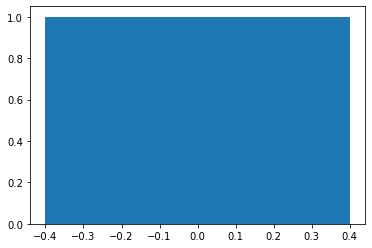

In [73]:
#xgboost
xgboost = XGBRegressor(max_depth = 6, alpha = 6) #max_depth=6, alpha = 6, gamma = 0.155)
xgboost.fit(train[['x_1']],train['y'])

# get importance
importance = xgboost.feature_importances_
# summarize feature importance
for a,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (a,v))
# plot feature importance
pyplot.bar([xy for xy in range(len(importance))], importance)
pyplot.show()


In [75]:
#FOR XGBOOST
c = 0
for element in range(len(test['y'])):
    predict1=xgboost.predict(x_test)
    #predict1=model.predict(new[['x']+['x_1']+['x_2']])
    print('predict: ' + str(predict1[element].reshape(1,-1)))
    print('x[element] 1: ' + str(((test.loc[element,'x_1']))))
    #print('x[element] 2: ' + str(((test.loc[element,'x_1']))))

    print('y[element]: ' + str((test['y'])[element]))
    
    value = (test['y'])[element]
    pred_value = (predict1[element].reshape(1,-1))[0][0]
    if ((pred_value <= 0.5) & (value == 0)):
        print('correct')
        c = c + 1
    elif ((pred_value >= 0.5) & (value == 1)):
        print('correct')
        c = c + 1
    else:
        print('wrong')
    print('********')

print('Correct: ' + str(c))
l = len(test['y'])
print((c/l)*100)

winsound.Beep(frequency, duration)

predict: [[0.3445]]
x[element] 1: 19.4
y[element]: 1
wrong
********
predict: [[0.37192354]]
x[element] 1: 33.166666666666664
y[element]: 1
wrong
********
predict: [[0.6777567]]
x[element] 1: 30.0
y[element]: 1
correct
********
predict: [[0.3970445]]
x[element] 1: 30.875
y[element]: 1
wrong
********
predict: [[0.66913384]]
x[element] 1: 24.825
y[element]: 1
correct
********
predict: [[0.66084725]]
x[element] 1: 25.25
y[element]: 1
correct
********
predict: [[0.6796938]]
x[element] 1: 26.16666666666667
y[element]: 1
correct
********
predict: [[0.22965899]]
x[element] 1: 41.333333333333336
y[element]: 1
wrong
********
predict: [[0.46062204]]
x[element] 1: 30.714285714285715
y[element]: 1
wrong
********
predict: [[0.68154013]]
x[element] 1: 21.66666666666667
y[element]: 1
correct
********
predict: [[0.6220899]]
x[element] 1: 27.11111111111111
y[element]: 1
correct
********
predict: [[0.67247844]]
x[element] 1: 23.42857142857143
y[element]: 1
correct
********
predict: [[0.6410353]]
x[elemen

predict: [[0.64573795]]
x[element] 1: 28.117647058823533
y[element]: 1
correct
********
predict: [[0.68329954]]
x[element] 1: 28.66666666666667
y[element]: 1
correct
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 1
correct
********
predict: [[0.6220899]]
x[element] 1: 27.1
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 1
wrong
********
predict: [[0.66132057]]
x[element] 1: 22.745454545454546
y[element]: 1
correct
********
predict: [[0.5724729]]
x[element] 1: 30.25
y[element]: 1
correct
********
predict: [[0.7065723]]
x[element] 1: 25.96
y[element]: 1
correct
********
predict: [[0.537719]]
x[element] 1: 29.26923076923077
y[element]: 1
correct
********
predict: [[0.6805587]]
x[element] 1: 24.93333333333333
y[element]: 1
correct
********
predict: [[0.627275]]
x[element] 1: 30.5
y[element]: 1
correct
********
predict: [[0.6935605]]
x[element] 1: 26.19230769230769
y[element]: 1
correct
********
predict: [[0.4211087]]
x[element] 1: 19.61904

predict: [[0.6907536]]
x[element] 1: 32.0
y[element]: 1
correct
********
predict: [[0.5875497]]
x[element] 1: 29.142857142857146
y[element]: 1
correct
********
predict: [[0.6796938]]
x[element] 1: 26.161290322580644
y[element]: 1
correct
********
predict: [[0.55040383]]
x[element] 1: 34.0
y[element]: 1
correct
********
predict: [[0.72487646]]
x[element] 1: 26.466666666666665
y[element]: 1
correct
********
predict: [[0.47423425]]
x[element] 1: 36.5
y[element]: 1
wrong
********
predict: [[0.5523265]]
x[element] 1: 31.25
y[element]: 1
correct
********
predict: [[0.7046721]]
x[element] 1: 27.66666666666667
y[element]: 1
correct
********
predict: [[0.6437562]]
x[element] 1: 30.33333333333333
y[element]: 1
correct
********
predict: [[0.5846612]]
x[element] 1: 29.71875
y[element]: 1
correct
********
predict: [[0.6278304]]
x[element] 1: 33.0
y[element]: 1
correct
********
predict: [[0.48668194]]
x[element] 1: 20.83333333333333
y[element]: 1
wrong
********
predict: [[0.819956]]
x[element] 1: 28

predict: [[0.40337947]]
x[element] 1: 17.333333333333332
y[element]: 1
wrong
********
predict: [[0.636715]]
x[element] 1: 30.285714285714285
y[element]: 1
correct
********
predict: [[0.41562778]]
x[element] 1: 32.142857142857146
y[element]: 1
wrong
********
predict: [[0.627275]]
x[element] 1: 30.5
y[element]: 1
correct
********
predict: [[0.5501293]]
x[element] 1: 30.11111111111111
y[element]: 1
correct
********
predict: [[0.7014533]]
x[element] 1: 23.75
y[element]: 1
correct
********
predict: [[0.5401916]]
x[element] 1: 31.83333333333333
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.625
y[element]: 1
correct
********
predict: [[0.37485024]]
x[element] 1: 34.54545454545455
y[element]: 1
wrong
********
predict: [[0.7142477]]
x[element] 1: 29.33333333333333
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.566666666666666
y[element]: 1
correct
********
predict: [[0.63029397]]
x[element] 1: 28.92857142857143
y[element]: 1
correct
********
pre

predict: [[0.5568941]]
x[element] 1: 29.62962962962963
y[element]: 1
correct
********
predict: [[0.7241044]]
x[element] 1: 24.41379310344828
y[element]: 1
correct
********
predict: [[0.4915452]]
x[element] 1: 34.5
y[element]: 1
wrong
********
predict: [[0.5724729]]
x[element] 1: 30.142857142857146
y[element]: 1
correct
********
predict: [[0.40657178]]
x[element] 1: 18.875
y[element]: 1
wrong
********
predict: [[0.5981924]]
x[element] 1: 29.58333333333333
y[element]: 1
correct
********
predict: [[0.66205126]]
x[element] 1: 24.5
y[element]: 1
correct
********
predict: [[0.68337035]]
x[element] 1: 25.375
y[element]: 1
correct
********
predict: [[0.55012995]]
x[element] 1: 27.3
y[element]: 1
correct
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 1
correct
********
predict: [[0.29394075]]
x[element] 1: 34.75
y[element]: 1
wrong
********
predict: [[0.5418649]]
x[element] 1: 21.452380952380953
y[element]: 1
correct
********
predict: [[0.40514487]]
x[element] 1: 33.35294117647

predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 1
correct
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 1
correct
********
predict: [[0.5808067]]
x[element] 1: 27.466666666666665
y[element]: 1
correct
********
predict: [[0.6949738]]
x[element] 1: 25.894736842105264
y[element]: 1
correct
********
predict: [[0.7014533]]
x[element] 1: 23.722222222222218
y[element]: 1
correct
********
predict: [[0.7127569]]
x[element] 1: 26.976190476190478
y[element]: 1
correct
********
predict: [[0.6681452]]
x[element] 1: 25.11111111111111
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.5875526]]
x[element] 1: 24.592592592592588
y[element]: 1
correct
********
predict: [[0.66084725]]
x[element] 1: 25.176470588235286
y[element]: 1
correct
********
predict: [[0.5804513]]
x[element] 1: 25.069767441860467
y[element]: 1
correct
********
predict: [[0.67344254]]
x[element] 1: 27.384615384615387
y[element]: 1
correct
****

predict: [[0.7046721]]
x[element] 1: 27.7
y[element]: 1
correct
********
predict: [[0.66913384]]
x[element] 1: 24.82857142857143
y[element]: 1
correct
********
predict: [[0.710889]]
x[element] 1: 23.33333333333333
y[element]: 1
correct
********
predict: [[0.4303985]]
x[element] 1: 34.642857142857146
y[element]: 1
wrong
********
predict: [[0.5170929]]
x[element] 1: 20.47058823529412
y[element]: 1
correct
********
predict: [[0.6935605]]
x[element] 1: 26.2
y[element]: 1
correct
********
predict: [[0.71182144]]
x[element] 1: 26.52083333333333
y[element]: 1
correct
********
predict: [[0.3970445]]
x[element] 1: 30.86666666666667
y[element]: 1
wrong
********
predict: [[0.41562778]]
x[element] 1: 32.125
y[element]: 1
wrong
********
predict: [[0.6220899]]
x[element] 1: 27.107142857142854
y[element]: 1
correct
********
predict: [[0.6762539]]
x[element] 1: 24.6875
y[element]: 1
correct
********
predict: [[0.40511823]]
x[element] 1: 36.333333333333336
y[element]: 1
wrong
********
predict: [[0.6613

predict: [[0.5596485]]
x[element] 1: 32.333333333333336
y[element]: 1
correct
********
predict: [[0.6992327]]
x[element] 1: 28.25
y[element]: 1
correct
********
predict: [[0.5077926]]
x[element] 1: 19.23076923076923
y[element]: 1
correct
********
predict: [[0.617789]]
x[element] 1: 25.615384615384613
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 1
correct
********
predict: [[0.7127569]]
x[element] 1: 27.03448275862069
y[element]: 1
correct
********
predict: [[0.66493875]]
x[element] 1: 24.25
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.7
y[element]: 1
correct
********
predict: [[0.567658]]
x[element] 1: 22.551724137931036
y[element]: 1
correct
********
predict: [[0.5936536]]
x[element] 1: 22.83333333333333
y[element]: 1
correct
********
predict: [[0.7142477]]
x[element] 1: 29.33333333333333
y[element]: 1
correct
********
predict: [[0.5080011]]
x[el

predict: [[0.7142477]]
x[element] 1: 29.33333333333333
y[element]: 1
correct
********
predict: [[0.7638892]]
x[element] 1: 28.33333333333333
y[element]: 1
correct
********
predict: [[0.54131234]]
x[element] 1: 21.444444444444443
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.665382]]
x[element] 1: 25.64
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.025
y[element]: 1
wrong
********
predict: [[0.6634635]]
x[element] 1: 24.86666666666667
y[element]: 1
correct
********
predict: [[0.68337035]]
x[element] 1: 25.322580645161292
y[element]: 1
correct
********
predict: [[0.71041316]]
x[element] 1: 26.88888888888889
y[element]: 1
correct
********
predict: [[0.40783283]]
x[element] 1: 35.666666666666664
y[element]: 1
wrong
********
predict: [[0.3970445]]
x[element] 1: 30.869565217391305
y[element]: 1
wrong
********
predict: [[0.7351595]]
x[element] 1: 26.76923076923077
y[element]: 1
correct
********
pre

predict: [[0.08414805]]
x[element] 1: 50.33333333333334
y[element]: 1
wrong
********
predict: [[0.6907536]]
x[element] 1: 32.0
y[element]: 1
correct
********
predict: [[0.3099223]]
x[element] 1: 44.0
y[element]: 1
wrong
********
predict: [[0.7101809]]
x[element] 1: 26.66666666666667
y[element]: 1
correct
********
predict: [[0.7031282]]
x[element] 1: 24.176470588235286
y[element]: 1
correct
********
predict: [[0.7350262]]
x[element] 1: 27.33333333333333
y[element]: 1
correct
********
predict: [[0.7391084]]
x[element] 1: 29.5
y[element]: 1
correct
********
predict: [[0.66084725]]
x[element] 1: 25.17241379310345
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.714285714285715
y[element]: 1
correct
********
predict: [[0.6777567]]
x[element] 1: 30.0
y[element]: 1
correct
********
predict: [[0.4922323]]
x[element] 1: 31.411764705882355
y[element]: 1
wrong
********
predict: [[0.6099376]]
x[element] 1: 25.76923076923077
y[element]: 1
correct
********
predict: [[0.6634635

predict: [[0.5416371]]
x[element] 1: 21.88888888888889
y[element]: 1
correct
********
predict: [[0.2068444]]
x[element] 1: 16.684210526315788
y[element]: 1
wrong
********
predict: [[0.6099376]]
x[element] 1: 25.772727272727273
y[element]: 1
correct
********
predict: [[0.657478]]
x[element] 1: 22.16666666666667
y[element]: 1
correct
********
predict: [[0.47917327]]
x[element] 1: 21.73076923076923
y[element]: 1
wrong
********
predict: [[0.6552156]]
x[element] 1: 22.4
y[element]: 1
correct
********
predict: [[0.5724729]]
x[element] 1: 30.18518518518519
y[element]: 1
correct
********
predict: [[0.20288384]]
x[element] 1: 15.75
y[element]: 1
wrong
********
predict: [[0.39759246]]
x[element] 1: 17.666666666666668
y[element]: 1
wrong
********
predict: [[0.5714887]]
x[element] 1: 22.461538461538463
y[element]: 1
correct
********
predict: [[0.62438464]]
x[element] 1: 30.615384615384613
y[element]: 1
correct
********
predict: [[0.68756896]]
x[element] 1: 23.235294117647058
y[element]: 1
correct


predict: [[0.6165577]]
x[element] 1: 30.466666666666665
y[element]: 1
correct
********
predict: [[0.67843145]]
x[element] 1: 31.5
y[element]: 1
correct
********
predict: [[0.6410353]]
x[element] 1: 23.535714285714285
y[element]: 1
correct
********
predict: [[0.667385]]
x[element] 1: 28.84615384615385
y[element]: 1
correct
********
predict: [[0.68737364]]
x[element] 1: 22.33333333333333
y[element]: 1
correct
********
predict: [[0.65832764]]
x[element] 1: 28.714285714285715
y[element]: 1
correct
********
predict: [[0.5602694]]
x[element] 1: 37.0
y[element]: 1
correct
********
predict: [[0.62653494]]
x[element] 1: 26.83333333333333
y[element]: 1
correct
********
predict: [[0.6410629]]
x[element] 1: 23.8125
y[element]: 1
correct
********
predict: [[0.7085187]]
x[element] 1: 25.705882352941174
y[element]: 1
correct
********
predict: [[0.52109545]]
x[element] 1: 21.58333333333333
y[element]: 1
correct
********
predict: [[0.70518553]]
x[element] 1: 27.5
y[element]: 1
correct
********
predict:

predict: [[0.48863527]]
x[element] 1: 35.5
y[element]: 1
wrong
********
predict: [[0.47372344]]
x[element] 1: 20.666666666666668
y[element]: 1
wrong
********
predict: [[0.29622278]]
x[element] 1: 36.77777777777778
y[element]: 1
wrong
********
predict: [[0.5846612]]
x[element] 1: 29.75
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.54545454545455
y[element]: 1
correct
********
predict: [[0.7031282]]
x[element] 1: 24.16666666666667
y[element]: 1
correct
********
predict: [[0.69391084]]
x[element] 1: 23.3125
y[element]: 1
correct
********
predict: [[0.5644645]]
x[element] 1: 21.7
y[element]: 1
correct
********
predict: [[0.5808067]]
x[element] 1: 27.466666666666665
y[element]: 1
correct
********
predict: [[0.34592965]]
x[element] 1: 17.8
y[element]: 1
wrong
********
predict: [[0.66657495]]
x[element] 1: 25.444444444444446
y[element]: 1
correct
********
predict: [[0.42256474]]
x[element] 1: 19.285714285714285
y[element]: 1
wrong
********
predict: [[0.45678642]]
x[el

predict: [[0.41562778]]
x[element] 1: 32.285714285714285
y[element]: 1
wrong
********
predict: [[0.5523265]]
x[element] 1: 31.266666666666666
y[element]: 1
correct
********
predict: [[0.40657178]]
x[element] 1: 18.916666666666668
y[element]: 1
wrong
********
predict: [[0.48377916]]
x[element] 1: 30.45
y[element]: 1
wrong
********
predict: [[0.55012995]]
x[element] 1: 27.30769230769231
y[element]: 1
correct
********
predict: [[0.5875526]]
x[element] 1: 24.63636363636364
y[element]: 1
correct
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 1
correct
********
predict: [[0.64634234]]
x[element] 1: 27.930232558139533
y[element]: 1
correct
********
predict: [[0.7226029]]
x[element] 1: 24.76923076923077
y[element]: 1
correct
********
predict: [[0.6986437]]
x[element] 1: 28.0
y[element]: 1
correct
********
predict: [[0.6986437]]
x[element] 1: 28.0
y[element]: 1
correct
********
predict: [[0.7046782]]
x[element] 1: 31.33333333333333
y[element]: 1
correct
********
predict: [[0.68

predict: [[0.7046721]]
x[element] 1: 27.66666666666667
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 1
wrong
********
predict: [[0.6634635]]
x[element] 1: 24.85
y[element]: 1
correct
********
predict: [[0.66152996]]
x[element] 1: 24.04
y[element]: 1
correct
********
predict: [[0.6992327]]
x[element] 1: 28.25
y[element]: 1
correct
********
predict: [[0.6578657]]
x[element] 1: 27.259259259259263
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.09556381]]
x[element] 1: 49.5
y[element]: 1
wrong
********
predict: [[0.5867689]]
x[element] 1: 23.176470588235286
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.7351595]]
x[element] 1: 26.79310344827586
y[element]: 1
correct
********
predict: [[0.36872527]]
x[element] 1: 18.779661016949152
y[element]: 1
wrong
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 1

predict: [[0.6095121]]
x[element] 1: 30.75
y[element]: 1
correct
********
predict: [[0.5752847]]
x[element] 1: 28.384615384615387
y[element]: 1
correct
********
predict: [[0.66568196]]
x[element] 1: 25.8125
y[element]: 1
correct
********
predict: [[0.71182144]]
x[element] 1: 26.57692307692308
y[element]: 1
correct
********
predict: [[0.5644645]]
x[element] 1: 21.7
y[element]: 1
correct
********
predict: [[0.6805587]]
x[element] 1: 24.90909090909091
y[element]: 1
correct
********
predict: [[0.6638119]]
x[element] 1: 26.705882352941174
y[element]: 1
correct
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 1
correct
********
predict: [[0.61084116]]
x[element] 1: 24.444444444444446
y[element]: 1
correct
********
predict: [[0.40337947]]
x[element] 1: 17.375
y[element]: 1
wrong
********
predict: [[0.52787924]]
x[element] 1: 32.52380952380953
y[element]: 1
correct
********
predict: [[0.68756896]]
x[element] 1: 23.222222222222218
y[element]: 1
correct
********
predict: [[0.680558

predict: [[0.66568196]]
x[element] 1: 25.8125
y[element]: 1
correct
********
predict: [[0.64919233]]
x[element] 1: 22.25
y[element]: 1
correct
********
predict: [[0.5867689]]
x[element] 1: 23.2
y[element]: 1
correct
********
predict: [[0.45854086]]
x[element] 1: 20.729166666666668
y[element]: 1
wrong
********
predict: [[0.62269]]
x[element] 1: 23.05
y[element]: 1
correct
********
predict: [[0.537719]]
x[element] 1: 29.25
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.69391084]]
x[element] 1: 23.25
y[element]: 1
correct
********
predict: [[0.710889]]
x[element] 1: 23.33333333333333
y[element]: 1
correct
********
predict: [[0.7085187]]
x[element] 1: 25.75
y[element]: 1
correct
********
predict: [[0.6525611]]
x[element] 1: 25.56521739130435
y[element]: 1
correct
********
predict: [[0.71041316]]
x[element] 1: 26.871794871794872
y[element]: 1
correct
********
predict: [[0.66568196]]
x[element] 1: 25.86666666666667
y[elem

predict: [[0.7085187]]
x[element] 1: 25.705882352941174
y[element]: 1
correct
********
predict: [[0.6569291]]
x[element] 1: 23.466666666666665
y[element]: 1
correct
********
predict: [[0.7638892]]
x[element] 1: 28.33333333333333
y[element]: 1
correct
********
predict: [[0.65832764]]
x[element] 1: 28.73333333333333
y[element]: 1
correct
********
predict: [[0.6762539]]
x[element] 1: 24.70833333333333
y[element]: 1
correct
********
predict: [[0.6935605]]
x[element] 1: 26.3125
y[element]: 1
correct
********
predict: [[0.62610835]]
x[element] 1: 28.555555555555557
y[element]: 1
correct
********
predict: [[0.4225848]]
x[element] 1: 32.77777777777778
y[element]: 1
wrong
********
predict: [[0.67843145]]
x[element] 1: 31.5
y[element]: 1
correct
********
predict: [[0.66568196]]
x[element] 1: 25.83333333333333
y[element]: 1
correct
********
predict: [[0.62438464]]
x[element] 1: 30.538461538461537
y[element]: 1
correct
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 1
correct
******

predict: [[0.6907536]]
x[element] 1: 32.0
y[element]: 1
correct
********
predict: [[0.7101809]]
x[element] 1: 26.66666666666667
y[element]: 1
correct
********
predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 1
correct
********
predict: [[0.69144624]]
x[element] 1: 24.9375
y[element]: 1
correct
********
predict: [[0.6762539]]
x[element] 1: 24.69230769230769
y[element]: 1
correct
********
predict: [[0.3230336]]
x[element] 1: 41.5
y[element]: 1
wrong
********
predict: [[0.55490285]]
x[element] 1: 19.818181818181817
y[element]: 1
correct
********
predict: [[0.3653671]]
x[element] 1: 19.46153846153846
y[element]: 1
wrong
********
predict: [[0.71041316]]
x[element] 1: 26.84848484848485
y[element]: 1
correct
********
predict: [[0.6184087]]
x[element] 1: 22.5
y[element]: 1
correct
********
predict: [[0.6935605]]
x[element] 1: 26.2
y[element]: 1
correct
********
predict: [[0.5875526]]
x[element] 1: 24.555555555555557
y[element]: 1
correct
********
predict: [[0.819956]]
x[element] 1: 28.5
y

predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 1
correct
********
predict: [[0.66084725]]
x[element] 1: 25.277777777777782
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.771428571428572
y[element]: 1
correct
********
predict: [[0.20527558]]
x[element] 1: 16.568181818181817
y[element]: 1
wrong
********
predict: [[0.6999027]]
x[element] 1: 24.34375
y[element]: 1
correct
********
predict: [[0.68756896]]
x[element] 1: 23.222222222222218
y[element]: 1
correct
********
predict: [[0.2578826]]
x[element] 1: 44.66666666666666
y[element]: 1
wrong
********
predict: [[0.665382]]
x[element] 1: 25.63636363636364
y[element]: 1
correct
********
predict: [[0.6999027]]
x[element] 1: 24.33333333333333
y[element]: 1
correct
********
predict: [[0.37192354]]
x[element] 1: 33.166666666666664
y[element]: 1
wrong
********
predict: [[0.67150193]]
x[element] 1: 24.73076923076923
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.675675675675677
y[element]: 1
c

predict: [[0.68337035]]
x[element] 1: 25.4
y[element]: 1
correct
********
predict: [[0.7101809]]
x[element] 1: 26.66666666666667
y[element]: 1
correct
********
predict: [[0.19666706]]
x[element] 1: 42.153846153846146
y[element]: 1
wrong
********
predict: [[0.6787455]]
x[element] 1: 26.032258064516128
y[element]: 1
correct
********
predict: [[0.5752847]]
x[element] 1: 28.42857142857143
y[element]: 1
correct
********
predict: [[0.41562778]]
x[element] 1: 32.142857142857146
y[element]: 1
wrong
********
predict: [[0.6755545]]
x[element] 1: 27.580645161290327
y[element]: 1
correct
********
predict: [[0.6437562]]
x[element] 1: 30.33333333333333
y[element]: 1
correct
********
predict: [[0.5846612]]
x[element] 1: 29.72727272727273
y[element]: 1
correct
********
predict: [[0.48077992]]
x[element] 1: 33.90909090909091
y[element]: 1
wrong
********
predict: [[0.5401595]]
x[element] 1: 19.666666666666668
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 20.94736842105263
y[element]

predict: [[0.66464114]]
x[element] 1: 25.42857142857143
y[element]: 1
correct
********
predict: [[0.10052005]]
x[element] 1: 45.8
y[element]: 1
wrong
********
predict: [[0.6907536]]
x[element] 1: 32.0
y[element]: 1
correct
********
predict: [[0.69391084]]
x[element] 1: 23.25
y[element]: 1
correct
********
predict: [[0.7014533]]
x[element] 1: 23.73684210526316
y[element]: 1
correct
********
predict: [[0.56967753]]
x[element] 1: 23.08333333333333
y[element]: 1
correct
********
predict: [[0.62438464]]
x[element] 1: 30.58333333333333
y[element]: 1
correct
********
predict: [[0.537719]]
x[element] 1: 29.24
y[element]: 1
correct
********
predict: [[0.7350262]]
x[element] 1: 27.33333333333333
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.05263157894737
y[element]: 1
wrong
********
predict: [[0.68737364]]
x[element] 1: 22.33333333333333
y[element]: 1
correct
********
predict: [[0.64573795]]
x[element] 1: 28.130434782608692
y[element]: 1
correct
********
predict: [[0.651

predict: [[0.52560186]]
x[element] 1: 29.22727272727273
y[element]: 1
correct
********
predict: [[0.5170929]]
x[element] 1: 20.425
y[element]: 1
correct
********
predict: [[0.40210566]]
x[element] 1: 35.90909090909091
y[element]: 1
wrong
********
predict: [[0.40532747]]
x[element] 1: 42.0
y[element]: 1
wrong
********
predict: [[0.61410743]]
x[element] 1: 28.91666666666667
y[element]: 1
correct
********
predict: [[0.5298905]]
x[element] 1: 19.727272727272727
y[element]: 1
correct
********
predict: [[0.49829504]]
x[element] 1: 31.65
y[element]: 1
wrong
********
predict: [[0.7142477]]
x[element] 1: 29.35294117647059
y[element]: 1
correct
********
predict: [[0.6972242]]
x[element] 1: 26.33333333333333
y[element]: 1
correct
********
predict: [[0.6972242]]
x[element] 1: 26.33333333333333
y[element]: 1
correct
********
predict: [[0.627275]]
x[element] 1: 30.5
y[element]: 1
correct
********
predict: [[0.65832764]]
x[element] 1: 28.75
y[element]: 1
correct
********
predict: [[0.7341696]]
x[elem

predict: [[0.66132057]]
x[element] 1: 22.66666666666667
y[element]: 1
correct
********
predict: [[0.7351595]]
x[element] 1: 26.76923076923077
y[element]: 1
correct
********
predict: [[0.68737364]]
x[element] 1: 22.33333333333333
y[element]: 1
correct
********
predict: [[0.5065413]]
x[element] 1: 20.5
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.6
y[element]: 1
correct
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 1
correct
********
predict: [[0.68737364]]
x[element] 1: 22.33333333333333
y[element]: 1
correct
********
predict: [[0.64573795]]
x[element] 1: 28.142857142857146
y[element]: 1
correct
********
predict: [[0.44448242]]
x[element] 1: 19.5
y[element]: 1
wrong
********
predict: [[0.6041004]]
x[element] 1: 33.666666666666664
y[element]: 1
correct
********
predict: [[0.567658]]
x[element] 1: 22.608695652173914
y[element]: 1
correct
********
predict: [[0.6552156]]
x[element] 1: 22.375
y[element]: 1
correct
********
predict: [[0.7014533]]
x[

predict: [[0.66132057]]
x[element] 1: 22.75
y[element]: 1
correct
********
predict: [[0.5228824]]
x[element] 1: 20.375
y[element]: 1
correct
********
predict: [[0.43093652]]
x[element] 1: 33.75
y[element]: 1
wrong
********
predict: [[0.5065413]]
x[element] 1: 20.5
y[element]: 1
correct
********
predict: [[0.65470463]]
x[element] 1: 23.689655172413797
y[element]: 1
correct
********
predict: [[0.65832764]]
x[element] 1: 28.714285714285715
y[element]: 1
correct
********
predict: [[0.6777567]]
x[element] 1: 30.0
y[element]: 1
correct
********
predict: [[0.5752847]]
x[element] 1: 28.421052631578952
y[element]: 1
correct
********
predict: [[0.49913275]]
x[element] 1: 20.0
y[element]: 1
wrong
********
predict: [[0.71041316]]
x[element] 1: 26.9
y[element]: 1
correct
********
predict: [[0.70211506]]
x[element] 1: 26.4
y[element]: 1
correct
********
predict: [[0.64416265]]
x[element] 1: 28.09090909090909
y[element]: 1
correct
********
predict: [[0.68337035]]
x[element] 1: 25.375
y[element]: 1
co

predict: [[0.7142477]]
x[element] 1: 29.33333333333333
y[element]: 1
correct
********
predict: [[0.5418649]]
x[element] 1: 21.5
y[element]: 1
correct
********
predict: [[0.7391084]]
x[element] 1: 29.5
y[element]: 1
correct
********
predict: [[0.71182144]]
x[element] 1: 26.5
y[element]: 1
correct
********
predict: [[0.3970445]]
x[element] 1: 30.894736842105264
y[element]: 1
wrong
********
predict: [[0.19995938]]
x[element] 1: 37.833333333333336
y[element]: 1
wrong
********
predict: [[0.7046721]]
x[element] 1: 27.689655172413797
y[element]: 1
correct
********
predict: [[0.6328764]]
x[element] 1: 31.66666666666667
y[element]: 1
correct
********
predict: [[0.39633363]]
x[element] 1: 39.5
y[element]: 1
wrong
********
predict: [[0.10052005]]
x[element] 1: 46.0
y[element]: 1
wrong
********
predict: [[0.61232734]]
x[element] 1: 28.058823529411764
y[element]: 1
correct
********
predict: [[0.6297393]]
x[element] 1: 22.0
y[element]: 1
correct
********
predict: [[0.55751204]]
x[element] 1: 29.9565

predict: [[0.6762539]]
x[element] 1: 24.69767441860465
y[element]: 1
correct
********
predict: [[0.43093652]]
x[element] 1: 33.6875
y[element]: 1
wrong
********
predict: [[0.39988205]]
x[element] 1: 18.4
y[element]: 1
wrong
********
predict: [[0.52704966]]
x[element] 1: 33.25
y[element]: 1
correct
********
predict: [[0.6796938]]
x[element] 1: 26.1
y[element]: 1
correct
********
predict: [[0.68329954]]
x[element] 1: 28.684210526315788
y[element]: 1
correct
********
predict: [[0.6184087]]
x[element] 1: 22.5
y[element]: 1
correct
********
predict: [[0.39759246]]
x[element] 1: 17.666666666666668
y[element]: 1
wrong
********
predict: [[0.6986437]]
x[element] 1: 28.0
y[element]: 1
correct
********
predict: [[0.66205126]]
x[element] 1: 24.5
y[element]: 1
correct
********
predict: [[0.3529611]]
x[element] 1: 35.65217391304348
y[element]: 1
wrong
********
predict: [[0.67843145]]
x[element] 1: 31.5
y[element]: 1
correct
********
predict: [[0.67843145]]
x[element] 1: 31.5
y[element]: 1
correct
**

predict: [[0.5724729]]
x[element] 1: 30.16666666666667
y[element]: 1
correct
********
predict: [[0.3445]]
x[element] 1: 19.428571428571427
y[element]: 1
wrong
********
predict: [[0.36305678]]
x[element] 1: 40.0
y[element]: 1
wrong
********
predict: [[0.6328764]]
x[element] 1: 31.66666666666667
y[element]: 1
correct
********
predict: [[0.7341696]]
x[element] 1: 25.0
y[element]: 1
correct
********
predict: [[0.6718583]]
x[element] 1: 25.5
y[element]: 1
correct
********
predict: [[0.68844247]]
x[element] 1: 25.117647058823533
y[element]: 1
correct
********
predict: [[0.5274774]]
x[element] 1: 39.0
y[element]: 1
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.2094742]]
x[element] 1: 16.272727272727273
y[element]: 1
wrong
********
predict: [[0.7127569]]
x[element] 1: 27.0
y[element]: 1
correct
********
predict: [[0.48081294]]
x[element] 1: 20.25
y[element]: 1
wrong
********
predict: [[0.648314]]
x[element] 1: 29.30769230769231
y[elemen

predict: [[0.6184087]]
x[element] 1: 22.5
y[element]: 1
correct
********
predict: [[0.25726095]]
x[element] 1: 18.133333333333333
y[element]: 1
wrong
********
predict: [[0.6888051]]
x[element] 1: 24.66666666666667
y[element]: 1
correct
********
predict: [[0.48983005]]
x[element] 1: 21.142857142857142
y[element]: 1
wrong
********
predict: [[0.5724729]]
x[element] 1: 30.16666666666667
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.045454545454547
y[element]: 1
wrong
********
predict: [[0.62269]]
x[element] 1: 23.058823529411764
y[element]: 1
correct
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 1
correct
********
predict: [[0.62685984]]
x[element] 1: 23.37142857142857
y[element]: 1
correct
********
predict: [[0.61410743]]
x[element] 1: 28.91666666666667
y[element]: 1
correct
********
predict: [[0.60198575]]
x[element] 1: 22.944444444444446
y[element]: 1
correct
********
predict: [[0.6699292]]
x[element] 1: 26.6875
y[element]: 1
correct
********
pred

predict: [[0.6410629]]
x[element] 1: 23.785714285714285
y[element]: 1
correct
********
predict: [[0.567658]]
x[element] 1: 22.6
y[element]: 1
correct
********
predict: [[0.6638119]]
x[element] 1: 26.69230769230769
y[element]: 1
correct
********
predict: [[0.4211087]]
x[element] 1: 19.59090909090909
y[element]: 1
wrong
********
predict: [[0.6298266]]
x[element] 1: 23.625
y[element]: 1
correct
********
predict: [[0.60739905]]
x[element] 1: 31.363636363636363
y[element]: 1
correct
********
predict: [[0.48668194]]
x[element] 1: 20.814814814814813
y[element]: 1
wrong
********
predict: [[0.39988205]]
x[element] 1: 18.33333333333333
y[element]: 1
wrong
********
predict: [[0.66205126]]
x[element] 1: 24.5
y[element]: 1
correct
********
predict: [[0.7341696]]
x[element] 1: 25.0
y[element]: 1
correct
********
predict: [[0.4044717]]
x[element] 1: 35.07692307692308
y[element]: 1
wrong
********
predict: [[0.6992327]]
x[element] 1: 28.23333333333333
y[element]: 1
correct
********
predict: [[0.6278304

correct
********
predict: [[0.68337035]]
x[element] 1: 25.38888888888889
y[element]: 1
correct
********
predict: [[0.6569291]]
x[element] 1: 23.5
y[element]: 1
correct
********
predict: [[0.5418649]]
x[element] 1: 21.542857142857148
y[element]: 1
correct
********
predict: [[0.7351595]]
x[element] 1: 26.73584905660377
y[element]: 1
correct
********
predict: [[0.2094742]]
x[element] 1: 16.25
y[element]: 1
wrong
********
predict: [[0.5916136]]
x[element] 1: 29.285714285714285
y[element]: 1
correct
********
predict: [[0.5936536]]
x[element] 1: 22.777777777777782
y[element]: 1
correct
********
predict: [[0.6298266]]
x[element] 1: 23.625
y[element]: 1
correct
********
predict: [[0.5875526]]
x[element] 1: 24.61111111111111
y[element]: 1
correct
********
predict: [[0.45854086]]
x[element] 1: 20.7
y[element]: 1
wrong
********
predict: [[0.5673217]]
x[element] 1: 29.7
y[element]: 1
correct
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 1
correct
********
predict: [[0.7031282]]
x[

predict: [[0.4307866]]
x[element] 1: 19.88888888888889
y[element]: 1
wrong
********
predict: [[0.40337947]]
x[element] 1: 17.342105263157894
y[element]: 1
wrong
********
predict: [[0.66205126]]
x[element] 1: 24.52173913043478
y[element]: 1
correct
********
predict: [[0.1846612]]
x[element] 1: 15.083333333333336
y[element]: 1
wrong
********
predict: [[0.55912346]]
x[element] 1: 29.894736842105264
y[element]: 1
correct
********
predict: [[0.60198575]]
x[element] 1: 22.95454545454545
y[element]: 1
correct
********
predict: [[0.7341696]]
x[element] 1: 25.0
y[element]: 1
correct
********
predict: [[0.5198365]]
x[element] 1: 29.857142857142854
y[element]: 1
correct
********
predict: [[0.66657495]]
x[element] 1: 25.444444444444446
y[element]: 1
correct
********
predict: [[0.57992136]]
x[element] 1: 27.142857142857146
y[element]: 1
correct
********
predict: [[0.25941345]]
x[element] 1: 37.266666666666666
y[element]: 1
wrong
********
predict: [[0.537719]]
x[element] 1: 29.272727272727273
y[elem

predict: [[0.5418649]]
x[element] 1: 21.5
y[element]: 1
correct
********
predict: [[0.5077926]]
x[element] 1: 19.2
y[element]: 1
correct
********
predict: [[0.5416371]]
x[element] 1: 21.88888888888889
y[element]: 1
correct
********
predict: [[0.6796938]]
x[element] 1: 26.142857142857146
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.58620689655172
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.54166666666667
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 1
wrong
********
predict: [[0.66568196]]
x[element] 1: 25.8
y[element]: 1
correct
********
predict: [[0.6874909]]
x[element] 1: 28.3125
y[element]: 1
correct
********
predict: [[0.75250536]]
x[element] 1: 23.411764705882355
y[element]: 1
correct
********
predict: [[0.5724729]]
x[element] 1: 30.214285714285715
y[element]: 1
correct
********
predict: [[0.5682849]]
x[element] 1: 37.5
y[element]: 1
correct
********
predict: [[0.7014533]]
x[element] 1: 23.7

predict: [[0.5752847]]
x[element] 1: 28.42857142857143
y[element]: 1
correct
********
predict: [[0.68737364]]
x[element] 1: 22.33333333333333
y[element]: 1
correct
********
predict: [[0.6437562]]
x[element] 1: 30.33333333333333
y[element]: 1
correct
********
predict: [[0.64634234]]
x[element] 1: 27.90909090909091
y[element]: 1
correct
********
predict: [[0.7226029]]
x[element] 1: 24.75
y[element]: 1
correct
********
predict: [[0.642955]]
x[element] 1: 23.580645161290327
y[element]: 1
correct
********
predict: [[0.65284985]]
x[element] 1: 26.375
y[element]: 1
correct
********
predict: [[0.21318449]]
x[element] 1: 15.2
y[element]: 1
wrong
********
predict: [[0.66084725]]
x[element] 1: 25.222222222222218
y[element]: 1
correct
********
predict: [[0.71041316]]
x[element] 1: 26.86666666666667
y[element]: 1
correct
********
predict: [[0.57992136]]
x[element] 1: 27.153846153846153
y[element]: 1
correct
********
predict: [[0.5065413]]
x[element] 1: 20.5
y[element]: 1
correct
********
predict: [

predict: [[0.62438464]]
x[element] 1: 30.588235294117645
y[element]: 1
correct
********
predict: [[0.65832764]]
x[element] 1: 28.714285714285715
y[element]: 1
correct
********
predict: [[0.75250536]]
x[element] 1: 23.411764705882355
y[element]: 1
correct
********
predict: [[0.6972242]]
x[element] 1: 26.325
y[element]: 1
correct
********
predict: [[0.657478]]
x[element] 1: 22.17391304347826
y[element]: 1
correct
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 1
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 1
wrong
********
predict: [[0.7085187]]
x[element] 1: 25.75
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.63636363636364
y[element]: 1
correct
********
predict: [[0.5936536]]
x[element] 1: 22.8
y[element]: 1
correct
********
predict: [[0.37192354]]
x[element] 1: 33.166666666666664
y[element]: 1
wrong
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 1
correct
********
predict: [[0.6298266]]
x[element] 1: 2

wrong
********
predict: [[0.6755545]]
x[element] 1: 27.57142857142857
y[element]: 1
correct
********
predict: [[0.6986437]]
x[element] 1: 28.0
y[element]: 1
correct
********
predict: [[0.5065413]]
x[element] 1: 20.571428571428573
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.625
y[element]: 1
correct
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 1
correct
********
predict: [[0.7127569]]
x[element] 1: 27.0
y[element]: 1
correct
********
predict: [[0.5867689]]
x[element] 1: 23.142857142857146
y[element]: 1
correct
********
predict: [[0.7007763]]
x[element] 1: 27.193548387096772
y[element]: 1
correct
********
predict: [[0.5875526]]
x[element] 1: 24.555555555555557
y[element]: 1
correct
********
predict: [[0.657478]]
x[element] 1: 22.16
y[element]: 1
correct
********
predict: [[0.68337035]]
x[element] 1: 25.33333333333333
y[element]: 1
correct
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 1
correct
********
predict: [[0.6787455]]

predict: [[0.4396005]]
x[element] 1: 33.333333333333336
y[element]: 1
wrong
********
predict: [[0.6720062]]
x[element] 1: 24.272727272727273
y[element]: 1
correct
********
predict: [[0.642955]]
x[element] 1: 23.592592592592588
y[element]: 1
correct
********
predict: [[0.75285906]]
x[element] 1: 24.8
y[element]: 1
correct
********
predict: [[0.69361985]]
x[element] 1: 24.35294117647059
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.66666666666667
y[element]: 1
correct
********
predict: [[0.6935605]]
x[element] 1: 26.222222222222218
y[element]: 1
correct
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 1
correct
********
predict: [[0.64573795]]
x[element] 1: 28.125
y[element]: 1
correct
********
predict: [[0.6755545]]
x[element] 1: 27.54545454545455
y[element]: 1
correct
********
predict: [[0.6972242]]
x[element] 1: 26.357142857142854
y[element]: 1
correct
********
predict: [[0.66132057]]
x[element] 1: 22.66666666666667
y[element]: 1
correct
*******

predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 1
correct
********
predict: [[0.19995938]]
x[element] 1: 37.77777777777778
y[element]: 1
wrong
********
predict: [[0.49829504]]
x[element] 1: 31.63636363636364
y[element]: 1
wrong
********
predict: [[0.6569291]]
x[element] 1: 23.5
y[element]: 1
correct
********
predict: [[0.47423425]]
x[element] 1: 36.5
y[element]: 1
wrong
********
predict: [[0.34592965]]
x[element] 1: 17.833333333333332
y[element]: 1
wrong
********
predict: [[0.5077926]]
x[element] 1: 19.25
y[element]: 1
correct
********
predict: [[0.6718583]]
x[element] 1: 25.5
y[element]: 1
correct
********
predict: [[0.6108714]]
x[element] 1: 22.904761904761905
y[element]: 1
correct
********
predict: [[0.7351595]]
x[element] 1: 26.777777777777782
y[element]: 1
correct
********
predict: [[0.7127569]]
x[element] 1: 27.0
y[element]: 1
correct
********
predict: [[0.41562778]]
x[element] 1: 32.166666666666664
y[element]: 1
wrong
********
predict: [[0.24141185]]
x[element] 1: 36.0909

y[element]: 1
correct
********
predict: [[0.69530004]]
x[element] 1: 24.09090909090909
y[element]: 1
correct
********
predict: [[0.7341696]]
x[element] 1: 25.0
y[element]: 1
correct
********
predict: [[0.5523265]]
x[element] 1: 31.25
y[element]: 1
correct
********
predict: [[0.7391084]]
x[element] 1: 29.470588235294123
y[element]: 1
correct
********
predict: [[0.5752847]]
x[element] 1: 28.357142857142854
y[element]: 1
correct
********
predict: [[0.5867689]]
x[element] 1: 23.2
y[element]: 1
correct
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 1
correct
********
predict: [[0.5846612]]
x[element] 1: 29.72727272727273
y[element]: 1
correct
********
predict: [[0.7351595]]
x[element] 1: 26.8
y[element]: 1
correct
********
predict: [[0.7046721]]
x[element] 1: 27.66666666666667
y[element]: 1
correct
********
predict: [[0.6650932]]
x[element] 1: 22.962962962962962
y[element]: 1
correct
********
predict: [[0.34592965]]
x[element] 1: 17.714285714285715
y[element]: 1
wrong
*****

predict: [[0.5065413]]
x[element] 1: 20.5
y[element]: 0
wrong
********
predict: [[0.15350224]]
x[element] 1: 14.5
y[element]: 0
correct
********
predict: [[0.0924175]]
x[element] 1: 11.666666666666664
y[element]: 0
correct
********
predict: [[0.71041316]]
x[element] 1: 26.84615384615385
y[element]: 0
wrong
********
predict: [[0.61084116]]
x[element] 1: 24.42857142857143
y[element]: 0
wrong
********
predict: [[0.2834465]]
x[element] 1: 16.7
y[element]: 0
correct
********
predict: [[0.12319742]]
x[element] 1: 43.27272727272727
y[element]: 0
correct
********
predict: [[0.71041316]]
x[element] 1: 26.84615384615385
y[element]: 0
wrong
********
predict: [[0.20046137]]
x[element] 1: 40.354838709677416
y[element]: 0
correct
********
predict: [[0.47917327]]
x[element] 1: 21.72
y[element]: 0
correct
********
predict: [[0.2068444]]
x[element] 1: 16.666666666666668
y[element]: 0
correct
********
predict: [[0.5669445]]
x[element] 1: 22.41666666666667
y[element]: 0
wrong
********
predict: [[0.198830

predict: [[0.4225848]]
x[element] 1: 32.92857142857143
y[element]: 0
correct
********
predict: [[0.5669445]]
x[element] 1: 22.41666666666667
y[element]: 0
wrong
********
predict: [[0.7327002]]
x[element] 1: 27.8
y[element]: 0
wrong
********
predict: [[0.2698504]]
x[element] 1: 17.166666666666668
y[element]: 0
correct
********
predict: [[0.55031246]]
x[element] 1: 31.923076923076927
y[element]: 0
wrong
********
predict: [[0.1327719]]
x[element] 1: 12.5
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 8.0
y[element]: 0
correct
********
predict: [[0.40514487]]
x[element] 1: 33.38095238095238
y[element]: 0
correct
********
predict: [[0.4915452]]
x[element] 1: 34.45454545454545
y[element]: 0
correct
********
predict: [[0.25092202]]
x[element] 1: 16.9
y[element]: 0
correct
********
predict: [[0.12319742]]
x[element] 1: 43.25
y[element]: 0
correct
********
predict: [[0.54979134]]
x[element] 1: 21.1875
y[element]: 0
wrong
********
predict: [[0.48776376]]
x[element] 1: 38.5


predict: [[0.0479111]]
x[element] 1: 63.0
y[element]: 0
correct
********
predict: [[0.15350224]]
x[element] 1: 14.73913043478261
y[element]: 0
correct
********
predict: [[0.33454722]]
x[element] 1: 34.2
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 7.538461538461537
y[element]: 0
correct
********
predict: [[0.07328045]]
x[element] 1: 74.66666666666667
y[element]: 0
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 57.5
y[element]: 0
correct
********
predict: [[0.09792394]]
x[element] 1: 46.375
y[element]: 0
correct
********
predict: [[0.25092202]]
x[element] 1: 16.785714285714285
y[element]: 0
correct
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.25941345]]
x[element] 1: 37.117647058823536
y[element]: 0
correct
********
predict: [[0.5198365]]
x[element] 1: 29.81081081081081
y[element]: 0
wrong
********
predict: [[0.6569291]]
x[element] 1: 23.4

y[element]: 0
wrong
********
predict: [[0.10919036]]
x[element] 1: 40.714285714285715
y[element]: 0
correct
********
predict: [[0.15123452]]
x[element] 1: 39.09090909090909
y[element]: 0
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 0
correct
********
predict: [[0.6777567]]
x[element] 1: 30.0
y[element]: 0
wrong
********
predict: [[0.65832764]]
x[element] 1: 28.73913043478261
y[element]: 0
wrong
********
predict: [[0.5065413]]
x[element] 1: 20.5
y[element]: 0
wrong
********
predict: [[0.64634234]]
x[element] 1: 27.92857142857143
y[element]: 0
wrong
********
predict: [[0.25726095]]
x[element] 1: 18.085714285714285
y[element]: 0
correct
********
predict: [[0.3970445]]
x[element] 1: 30.85
y[element]: 0
correct
********
predict: [[0.0924175]]
x[element] 1: 11.785714285714285
y[element]: 0
correct
********
predict: [[0.10282166]]
x[element] 1: 122.0
y[element]: 0
correct
********
predict: [[0.2094742]]
x[element] 1: 16.375
y[element]: 0
correct
********
predict: [[0.

x[element] 1: 19.08333333333333
y[element]: 0
correct
********
predict: [[0.5752847]]
x[element] 1: 28.42857142857143
y[element]: 0
wrong
********
predict: [[0.10052005]]
x[element] 1: 45.06153846153846
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 67.0
y[element]: 0
correct
********
predict: [[0.56967753]]
x[element] 1: 23.08333333333333
y[element]: 0
wrong
********
predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 0
wrong
********
predict: [[0.41562778]]
x[element] 1: 32.3
y[element]: 0
correct
********
predict: [[0.499204]]
x[element] 1: 21.045454545454547
y[element]: 0
correct
********
predict: [[0.7046721]]
x[element] 1: 27.66666666666667
y[element]: 0
wrong
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 0
wrong
********
predict: [[0.10282166]]
x[element] 1: 110.66666666666669
y[element]: 0
correct
********
predict: [[0.10919036]]
x[element] 1: 40.6875
y[element]: 0
correct
********
predict: [[0.1105665]]
x[element] 1: 47.08333333333334
y

predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 0
wrong
********
predict: [[0.10783242]]
x[element] 1: 52.0
y[element]: 0
correct
********
predict: [[0.72487646]]
x[element] 1: 26.45
y[element]: 0
wrong
********
predict: [[0.66084725]]
x[element] 1: 25.25
y[element]: 0
wrong
********
predict: [[0.7046782]]
x[element] 1: 31.33333333333333
y[element]: 0
wrong
********
predict: [[0.63029397]]
x[element] 1: 28.970588235294123
y[element]: 0
wrong
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 0
wrong
********
predict: [[0.6718583]]
x[element] 1: 25.5
y[element]: 0
wrong
********
predict: [[0.49913275]]
x[element] 1: 20.0
y[element]: 0
correct
********
predict: [[0.15491322]]
x[element] 1: 39.90909090909091
y[element]: 0
correct
********
predict: [[0.25941345]]
x[element] 1: 37.07692307692308
y[element]: 0
correct
********
predict: [[0.22965899]]
x[element] 1: 41.45454545454545
y[element]: 0
correct
********
predict: [[0.5137888]]
x[element] 1: 33.04545454545455
y[ele

predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 0
wrong
********
predict: [[0.6379541]]
x[element] 1: 23.9375
y[element]: 0
wrong
********
predict: [[0.59564704]]
x[element] 1: 27.818181818181817
y[element]: 0
wrong
********
predict: [[0.40210566]]
x[element] 1: 35.90909090909091
y[element]: 0
correct
********
predict: [[0.55490285]]
x[element] 1: 19.80769230769231
y[element]: 0
wrong
********
predict: [[0.5875526]]
x[element] 1: 24.57142857142857
y[element]: 0
wrong
********
predict: [[0.620033]]
x[element] 1: 24.22727272727273
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 63.2
y[element]: 0
correct
********
predict: [[0.5167499]]
x[element] 1: 20.8
y[element]: 0
wrong
********
predict: [[0.7350262]]
x[element] 1: 27.33333333333333
y[element]: 0
wrong
********
predict: [[0.6874909]]
x[element] 1: 28.3
y[element]: 0
wrong
********
predict: [[0.19752002]]
x[element] 1: 44.555555555555564
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 68.0
y

********
predict: [[0.7350262]]
x[element] 1: 27.33333333333333
y[element]: 0
wrong
********
predict: [[0.56821465]]
x[element] 1: 27.125
y[element]: 0
wrong
********
predict: [[0.29394075]]
x[element] 1: 34.833333333333336
y[element]: 0
correct
********
predict: [[0.5198365]]
x[element] 1: 29.86666666666667
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 54.75
y[element]: 0
correct
********
predict: [[0.28247547]]
x[element] 1: 41.0
y[element]: 0
correct
********
predict: [[0.36872527]]
x[element] 1: 18.782608695652176
y[element]: 0
correct
********
predict: [[0.5846612]]
x[element] 1: 29.75
y[element]: 0
wrong
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 0
wrong
********
predict: [[0.03911561]]
x[element] 1: 1.0
y[element]: 0
correct
********
predict: [[0.6220899]]
x[element] 1: 27.1
y[element]: 0
wrong
********
predict: [[0.499204]]
x[element] 1: 20.952380952380953
y[element]: 0
correct
********
predict: [[0.6762539]]
x[element] 1: 24.67857142857

predict: [[0.07658485]]
x[element] 1: 88.4
y[element]: 0
correct
********
predict: [[0.08414805]]
x[element] 1: 50.4
y[element]: 0
correct
********
predict: [[0.06185604]]
x[element] 1: 52.5
y[element]: 0
correct
********
predict: [[0.47955623]]
x[element] 1: 34.05555555555556
y[element]: 0
correct
********
predict: [[0.23650803]]
x[element] 1: 35.18181818181818
y[element]: 0
correct
********
predict: [[0.499204]]
x[element] 1: 21.071428571428573
y[element]: 0
correct
********
predict: [[0.0924175]]
x[element] 1: 11.333333333333336
y[element]: 0
correct
********
predict: [[0.12319742]]
x[element] 1: 43.111111111111114
y[element]: 0
correct
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 0
wrong
********
predict: [[0.10919036]]
x[element] 1: 40.75
y[element]: 0
correct
********
predict: [[0.55490285]]
x[element] 1: 19.8
y[element]: 0
wrong
********
predict: [[0.48081294]]
x[element] 1: 20.315789473684212
y[element]: 0
correct
********
predict: [[0.60263526]]
x[element] 1:

predict: [[0.10919036]]
x[element] 1: 40.888888888888886
y[element]: 0
correct
********
predict: [[0.22321744]]
x[element] 1: 37.555555555555564
y[element]: 0
correct
********
predict: [[0.6823228]]
x[element] 1: 30.66666666666667
y[element]: 0
wrong
********
predict: [[0.68737364]]
x[element] 1: 22.33333333333333
y[element]: 0
wrong
********
predict: [[0.7341696]]
x[element] 1: 25.0
y[element]: 0
wrong
********
predict: [[0.62443703]]
x[element] 1: 24.470588235294123
y[element]: 0
wrong
********
predict: [[0.06185604]]
x[element] 1: 53.0
y[element]: 0
correct
********
predict: [[0.62610835]]
x[element] 1: 28.54545454545455
y[element]: 0
wrong
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.13741435]]
x[element] 1: 13.5
y[element]: 0
correct
********
predict: [[0.64416265]]
x[element] 1: 28.1
y[element]: 0
wrong
********
predict: [[0.5752847]]
x[element] 1: 28.4
y[element]: 0
wrong
********
predict: [[0.49913275]]
x[element] 1: 20.0
y[element

predict: [[0.5501293]]
x[element] 1: 30.09090909090909
y[element]: 0
wrong
********
predict: [[0.45678642]]
x[element] 1: 20.076923076923077
y[element]: 0
correct
********
predict: [[0.5077926]]
x[element] 1: 19.1875
y[element]: 0
wrong
********
predict: [[0.10919036]]
x[element] 1: 40.8
y[element]: 0
correct
********
predict: [[0.15123452]]
x[element] 1: 39.125
y[element]: 0
correct
********
predict: [[0.10919036]]
x[element] 1: 40.8
y[element]: 0
correct
********
predict: [[0.5491261]]
x[element] 1: 21.62857142857143
y[element]: 0
wrong
********
predict: [[0.3970445]]
x[element] 1: 30.875
y[element]: 0
correct
********
predict: [[0.10844953]]
x[element] 1: 48.14285714285714
y[element]: 0
correct
********
predict: [[0.591577]]
x[element] 1: 21.315789473684212
y[element]: 0
wrong
********
predict: [[0.03911561]]
x[element] 1: 5.0
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 4.666666666666667
y[element]: 0
correct
********
predict: [[0.5936536]]
x[element] 1: 22.

predict: [[0.617789]]
x[element] 1: 25.588235294117645
y[element]: 0
wrong
********
predict: [[0.6628868]]
x[element] 1: 29.51851851851852
y[element]: 0
wrong
********
predict: [[0.39759246]]
x[element] 1: 17.666666666666668
y[element]: 0
correct
********
predict: [[0.6796938]]
x[element] 1: 26.153846153846153
y[element]: 0
wrong
********
predict: [[0.32502154]]
x[element] 1: 35.25925925925926
y[element]: 0
correct
********
predict: [[0.10282166]]
x[element] 1: 109.0
y[element]: 0
correct
********
predict: [[0.69530004]]
x[element] 1: 24.09090909090909
y[element]: 0
wrong
********
predict: [[0.69324076]]
x[element] 1: 25.91891891891892
y[element]: 0
wrong
********
predict: [[0.6755545]]
x[element] 1: 27.538461538461537
y[element]: 0
wrong
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 0
wrong
********
predict: [[0.16529977]]
x[element] 1: 42.74509803921568
y[element]: 0
correct
********
predict: [[0.66084725]]
x[element] 1: 25.2
y[element]: 0
wrong
********
predict: [[

predict: [[0.50467473]]
x[element] 1: 30.45833333333333
y[element]: 0
wrong
********
predict: [[0.5724729]]
x[element] 1: 30.190476190476193
y[element]: 0
wrong
********
predict: [[0.60842085]]
x[element] 1: 21.75
y[element]: 0
wrong
********
predict: [[0.5170929]]
x[element] 1: 20.384615384615387
y[element]: 0
wrong
********
predict: [[0.08414805]]
x[element] 1: 51.444444444444436
y[element]: 0
correct
********
predict: [[0.5875526]]
x[element] 1: 24.615384615384613
y[element]: 0
wrong
********
predict: [[0.10282166]]
x[element] 1: 230.0
y[element]: 0
correct
********
predict: [[0.6777567]]
x[element] 1: 30.0
y[element]: 0
wrong
********
predict: [[0.47917327]]
x[element] 1: 21.722222222222218
y[element]: 0
correct
********
predict: [[0.1105665]]
x[element] 1: 47.16666666666666
y[element]: 0
correct
********
predict: [[0.16860783]]
x[element] 1: 13.137931034482758
y[element]: 0
correct
********
predict: [[0.61379236]]
x[element] 1: 26.066666666666666
y[element]: 0
wrong
********
predi

predict: [[0.12319742]]
x[element] 1: 43.111111111111114
y[element]: 0
correct
********
predict: [[0.5401595]]
x[element] 1: 19.666666666666668
y[element]: 0
wrong
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 0
wrong
********
predict: [[0.5384812]]
x[element] 1: 30.642857142857146
y[element]: 0
wrong
********
predict: [[0.45552787]]
x[element] 1: 33.473684210526315
y[element]: 0
correct
********
predict: [[0.35404605]]
x[element] 1: 19.952380952380953
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 56.14285714285714
y[element]: 0
correct
********
predict: [[0.6134696]]
x[element] 1: 32.666666666666664
y[element]: 0
wrong
********
predict: [[0.16529977]]
x[element] 1: 42.869565217391305
y[element]: 0
correct
********
predict: [[0.6552156]]
x[element] 1: 22.375
y[element]: 0
wrong
********
predict: [[0.7351595]]
x[element] 1: 26.764705882352942
y[element]: 0
wrong
********
predict: [[0.68844247]]
x[element] 1: 25.125
y[element]: 0
wrong
********
pre

predict: [[0.10783242]]
x[element] 1: 51.875
y[element]: 0
correct
********
predict: [[0.10223017]]
x[element] 1: 46.75
y[element]: 0
correct
********
predict: [[0.09556381]]
x[element] 1: 49.75
y[element]: 0
correct
********
predict: [[0.52744997]]
x[element] 1: 22.1
y[element]: 0
wrong
********
predict: [[0.09556381]]
x[element] 1: 49.88888888888889
y[element]: 0
correct
********
predict: [[0.6634635]]
x[element] 1: 24.83333333333333
y[element]: 0
wrong
********
predict: [[0.5936536]]
x[element] 1: 22.83333333333333
y[element]: 0
wrong
********
predict: [[0.14469904]]
x[element] 1: 43.555555555555564
y[element]: 0
correct
********
predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 0
wrong
********
predict: [[0.6514273]]
x[element] 1: 29.07142857142857
y[element]: 0
wrong
********
predict: [[0.10282166]]
x[element] 1: 118.0
y[element]: 0
correct
********
predict: [[0.29327947]]
x[element] 1: 17.916666666666668
y[element]: 0
correct
********
predict: [[0.41562778]]
x[element] 1: 32.

x[element] 1: 29.57142857142857
y[element]: 0
wrong
********
predict: [[0.5401595]]
x[element] 1: 19.647058823529417
y[element]: 0
wrong
********
predict: [[0.09556381]]
x[element] 1: 48.5625
y[element]: 0
correct
********
predict: [[0.4216949]]
x[element] 1: 20.625
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 7.0
y[element]: 0
correct
********
predict: [[0.20046137]]
x[element] 1: 40.4
y[element]: 0
correct
********
predict: [[0.6755545]]
x[element] 1: 27.54545454545455
y[element]: 0
wrong
********
predict: [[0.71041316]]
x[element] 1: 26.86666666666667
y[element]: 0
wrong
********
predict: [[0.710889]]
x[element] 1: 23.33333333333333
y[element]: 0
wrong
********
predict: [[0.22561796]]
x[element] 1: 38.8
y[element]: 0
correct
********
predict: [[0.48081294]]
x[element] 1: 20.272727272727273
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 57.28571428571429
y[element]: 0
correct
********
predict: [[0.69530004]]
x[element] 1: 24.125
y[element]

predict: [[0.08414805]]
x[element] 1: 50.8
y[element]: 0
correct
********
predict: [[0.15350224]]
x[element] 1: 14.344827586206893
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 54.714285714285715
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 6.0
y[element]: 0
correct
********
predict: [[0.66132057]]
x[element] 1: 22.76923076923077
y[element]: 0
wrong
********
predict: [[0.1846612]]
x[element] 1: 15.0
y[element]: 0
correct
********
predict: [[0.36267543]]
x[element] 1: 36.42857142857143
y[element]: 0
correct
********
predict: [[0.1987215]]
x[element] 1: 40.6
y[element]: 0
correct
********
predict: [[0.19823246]]
x[element] 1: 15.428571428571427
y[element]: 0
correct
********
predict: [[0.5274774]]
x[element] 1: 39.0
y[element]: 0
wrong
********
predict: [[0.64919233]]
x[element] 1: 22.25
y[element]: 0
wrong
********
predict: [[0.2094742]]
x[element] 1: 16.25
y[element]: 0
correct
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 

predict: [[0.09696008]]
x[element] 1: 10.5
y[element]: 0
correct
********
predict: [[0.2698504]]
x[element] 1: 17.166666666666668
y[element]: 0
correct
********
predict: [[0.57065654]]
x[element] 1: 32.75
y[element]: 0
wrong
********
predict: [[0.7327002]]
x[element] 1: 27.78947368421053
y[element]: 0
wrong
********
predict: [[0.08414805]]
x[element] 1: 50.33333333333334
y[element]: 0
correct
********
predict: [[0.62707853]]
x[element] 1: 30.90909090909091
y[element]: 0
wrong
********
predict: [[0.22965899]]
x[element] 1: 41.25
y[element]: 0
correct
********
predict: [[0.4303985]]
x[element] 1: 34.666666666666664
y[element]: 0
correct
********
predict: [[0.18977447]]
x[element] 1: 38.2
y[element]: 0
correct
********
predict: [[0.4922323]]
x[element] 1: 31.375
y[element]: 0
correct
********
predict: [[0.55490285]]
x[element] 1: 19.846153846153847
y[element]: 0
wrong
********
predict: [[0.48077992]]
x[element] 1: 33.90909090909091
y[element]: 0
correct
********
predict: [[0.5897951]]
x[e

x[element] 1: 24.57142857142857
y[element]: 0
wrong
********
predict: [[0.25726095]]
x[element] 1: 18.157894736842106
y[element]: 0
correct
********
predict: [[0.5846612]]
x[element] 1: 29.73913043478261
y[element]: 0
wrong
********
predict: [[0.2578826]]
x[element] 1: 44.63636363636363
y[element]: 0
correct
********
predict: [[0.6328764]]
x[element] 1: 31.66666666666667
y[element]: 0
wrong
********
predict: [[0.4307866]]
x[element] 1: 19.894736842105264
y[element]: 0
correct
********
predict: [[0.4396005]]
x[element] 1: 33.333333333333336
y[element]: 0
correct
********
predict: [[0.2094742]]
x[element] 1: 16.263157894736842
y[element]: 0
correct
********
predict: [[0.5228824]]
x[element] 1: 20.375
y[element]: 0
wrong
********
predict: [[0.42256474]]
x[element] 1: 19.363636363636363
y[element]: 0
correct
********
predict: [[0.40514487]]
x[element] 1: 33.4
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 6.5
y[element]: 0
correct
********
predict: [[0.7127569]]
x[ele

predict: [[0.7241044]]
x[element] 1: 24.423076923076927
y[element]: 0
wrong
********
predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 0
wrong
********
predict: [[0.5875526]]
x[element] 1: 24.56521739130435
y[element]: 0
wrong
********
predict: [[0.5198365]]
x[element] 1: 29.81081081081081
y[element]: 0
wrong
********
predict: [[0.70518553]]
x[element] 1: 27.5
y[element]: 0
wrong
********
predict: [[0.62438464]]
x[element] 1: 30.54545454545455
y[element]: 0
wrong
********
predict: [[0.29661137]]
x[element] 1: 43.0
y[element]: 0
correct
********
predict: [[0.1105665]]
x[element] 1: 47.66666666666666
y[element]: 0
correct
********
predict: [[0.20288384]]
x[element] 1: 16.0
y[element]: 0
correct
********
predict: [[0.5936536]]
x[element] 1: 22.786127167630053
y[element]: 0
wrong
********
predict: [[0.667385]]
x[element] 1: 28.78947368421053
y[element]: 0
wrong
********
predict: [[0.3081154]]
x[element] 1: 18.0
y[element]: 0
correct
********
predict: [[0.6681452]]
x[element] 1: 25.0833

predict: [[0.30907682]]
x[element] 1: 17.3
y[element]: 0
correct
********
predict: [[0.27433658]]
x[element] 1: 35.4
y[element]: 0
correct
********
predict: [[0.51866055]]
x[element] 1: 22.45
y[element]: 0
wrong
********
predict: [[0.67341226]]
x[element] 1: 26.642857142857146
y[element]: 0
wrong
********
predict: [[0.45854086]]
x[element] 1: 20.72
y[element]: 0
correct
********
predict: [[0.6823228]]
x[element] 1: 30.66666666666667
y[element]: 0
wrong
********
predict: [[0.15350224]]
x[element] 1: 14.2
y[element]: 0
correct
********
predict: [[0.04804673]]
x[element] 1: 8.5
y[element]: 0
correct
********
predict: [[0.34463596]]
x[element] 1: 39.6
y[element]: 0
correct
********
predict: [[0.44831252]]
x[element] 1: 32.615384615384606
y[element]: 0
correct
********
predict: [[0.6298266]]
x[element] 1: 23.625
y[element]: 0
wrong
********
predict: [[0.39797285]]
x[element] 1: 32.45454545454545
y[element]: 0
correct
********
predict: [[0.15665254]]
x[element] 1: 44.230769230769226
y[elemen

predict: [[0.49829504]]
x[element] 1: 31.555555555555557
y[element]: 0
correct
********
predict: [[0.36267543]]
x[element] 1: 36.45454545454545
y[element]: 0
correct
********
predict: [[0.7127569]]
x[element] 1: 27.0
y[element]: 0
wrong
********
predict: [[0.2343737]]
x[element] 1: 40.53846153846154
y[element]: 0
correct
********
predict: [[0.4211087]]
x[element] 1: 19.555555555555557
y[element]: 0
correct
********
predict: [[0.44656357]]
x[element] 1: 32.07142857142857
y[element]: 0
correct
********
predict: [[0.4216949]]
x[element] 1: 20.657894736842106
y[element]: 0
correct
********
predict: [[0.40210566]]
x[element] 1: 35.875
y[element]: 0
correct
********
predict: [[0.65832764]]
x[element] 1: 28.75
y[element]: 0
wrong
********
predict: [[0.5077926]]
x[element] 1: 19.25
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 56.4
y[element]: 0
correct
********
predict: [[0.20288384]]
x[element] 1: 16.10810810810811
y[element]: 0
correct
********
predict: [[0.27433658]]
x[

predict: [[0.5080011]]
x[element] 1: 35.0
y[element]: 0
wrong
********
predict: [[0.69530004]]
x[element] 1: 24.125
y[element]: 0
wrong
********
predict: [[0.7341696]]
x[element] 1: 24.967741935483872
y[element]: 0
wrong
********
predict: [[0.7007763]]
x[element] 1: 27.23076923076923
y[element]: 0
wrong
********
predict: [[0.45036125]]
x[element] 1: 21.272727272727273
y[element]: 0
correct
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.07658485]]
x[element] 1: 90.5
y[element]: 0
correct
********
predict: [[0.7127569]]
x[element] 1: 26.95
y[element]: 0
wrong
********
predict: [[0.5867689]]
x[element] 1: 23.2
y[element]: 0
wrong
********
predict: [[0.36401975]]
x[element] 1: 34.333333333333336
y[element]: 0
correct
********
predict: [[0.48023298]]
x[element] 1: 31.777777777777782
y[element]: 0
correct
********
predict: [[0.2094742]]
x[element] 1: 16.315789473684212
y[element]: 0
correct
********
predict: [[0.62232816]]
x[element] 1: 21.125
y[e

predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.34463596]]
x[element] 1: 39.6
y[element]: 0
correct
********
predict: [[0.10282166]]
x[element] 1: 128.0
y[element]: 0
correct
********
predict: [[0.6255867]]
x[element] 1: 22.3
y[element]: 0
wrong
********
predict: [[0.4225848]]
x[element] 1: 32.86206896551724
y[element]: 0
correct
********
predict: [[0.33454722]]
x[element] 1: 34.2
y[element]: 0
correct
********
predict: [[0.45854086]]
x[element] 1: 20.724137931034484
y[element]: 0
correct
********
predict: [[0.67344254]]
x[element] 1: 27.384615384615387
y[element]: 0
wrong
********
predict: [[0.49244106]]
x[element] 1: 31.125
y[element]: 0
correct
********
predict: [[0.73784775]]
x[element] 1: 30.964285714285715
y[element]: 0
wrong
********
predict: [[0.40783283]]
x[element] 1: 35.666666666666664
y[element]: 0
correct
********
predict: [[0.66084725]]
x[element] 1: 25.23809523809524
y[element]: 0
wrong
********
predict: [[0.13741435]]
x[element] 1: 14.

predict: [[0.10282166]]
x[element] 1: 230.0
y[element]: 0
correct
********
predict: [[0.66132057]]
x[element] 1: 22.684210526315788
y[element]: 0
wrong
********
predict: [[0.642955]]
x[element] 1: 23.57142857142857
y[element]: 0
wrong
********
predict: [[0.29622278]]
x[element] 1: 36.86666666666667
y[element]: 0
correct
********
predict: [[0.819956]]
x[element] 1: 28.5
y[element]: 0
wrong
********
predict: [[0.33454722]]
x[element] 1: 34.111111111111114
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 7.4
y[element]: 0
correct
********
predict: [[0.819956]]
x[element] 1: 28.5
y[element]: 0
wrong
********
predict: [[0.40783283]]
x[element] 1: 35.666666666666664
y[element]: 0
correct
********
predict: [[0.6578657]]
x[element] 1: 27.235294117647058
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 57.0
y[element]: 0
correct
********
predict: [[0.55609816]]
x[element] 1: 21.222222222222218
y[element]: 0
wrong
********
predict: [[0.54131234]]
x[element] 1

predict: [[0.5077926]]
x[element] 1: 19.206896551724142
y[element]: 0
wrong
********
predict: [[0.6948528]]
x[element] 1: 23.714285714285715
y[element]: 0
wrong
********
predict: [[0.2094742]]
x[element] 1: 16.372093023255815
y[element]: 0
correct
********
predict: [[0.6578657]]
x[element] 1: 27.25
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 58.0
y[element]: 0
correct
********
predict: [[0.0785765]]
x[element] 1: 10.0
y[element]: 0
correct
********
predict: [[0.19752002]]
x[element] 1: 44.6
y[element]: 0
correct
********
predict: [[0.39988205]]
x[element] 1: 18.44117647058824
y[element]: 0
correct
********
predict: [[0.36872527]]
x[element] 1: 18.7
y[element]: 0
correct
********
predict: [[0.5416371]]
x[element] 1: 21.882352941176467
y[element]: 0
wrong
********
predict: [[0.7127569]]
x[element] 1: 27.0
y[element]: 0
wrong
********
predict: [[0.12319742]]
x[element] 1: 43.25
y[element]: 0
correct
********
predict: [[0.617789]]
x[element] 1: 25.615384615384613
y[el

predict: [[0.5298905]]
x[element] 1: 19.714285714285715
y[element]: 0
wrong
********
predict: [[0.5752847]]
x[element] 1: 28.40425531914893
y[element]: 0
wrong
********
predict: [[0.04897744]]
x[element] 1: 71.27777777777777
y[element]: 0
correct
********
predict: [[0.5752847]]
x[element] 1: 28.384615384615387
y[element]: 0
wrong
********
predict: [[0.25726095]]
x[element] 1: 18.066666666666666
y[element]: 0
correct
********
predict: [[0.67843145]]
x[element] 1: 31.5
y[element]: 0
wrong
********
predict: [[0.15123452]]
x[element] 1: 39.117647058823536
y[element]: 0
correct
********
predict: [[0.66568196]]
x[element] 1: 25.85
y[element]: 0
wrong
********
predict: [[0.636715]]
x[element] 1: 30.32142857142857
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 59.66666666666666
y[element]: 0
correct
********
predict: [[0.19823246]]
x[element] 1: 15.6
y[element]: 0
correct
********
predict: [[0.67843145]]
x[element] 1: 31.523809523809533
y[element]: 0
wrong
********
predict: 

predict: [[0.30972004]]
x[element] 1: 36.66666666666666
y[element]: 0
correct
********
predict: [[0.1105665]]
x[element] 1: 48.0
y[element]: 0
correct
********
predict: [[0.7085187]]
x[element] 1: 25.75
y[element]: 0
wrong
********
predict: [[0.23650803]]
x[element] 1: 35.125
y[element]: 0
correct
********
predict: [[0.10282166]]
x[element] 1: 102.75
y[element]: 0
correct
********
predict: [[0.04897744]]
x[element] 1: 72.06666666666666
y[element]: 0
correct
********
predict: [[0.6755545]]
x[element] 1: 27.538461538461537
y[element]: 0
wrong
********
predict: [[0.1327719]]
x[element] 1: 12.24390243902439
y[element]: 0
correct
********
predict: [[0.6041004]]
x[element] 1: 33.65
y[element]: 0
wrong
********
predict: [[0.16303179]]
x[element] 1: 43.5
y[element]: 0
correct
********
predict: [[0.22965899]]
x[element] 1: 41.333333333333336
y[element]: 0
correct
********
predict: [[0.20809391]]
x[element] 1: 41.63636363636363
y[element]: 0
correct
********
predict: [[0.44831252]]
x[element] 1:

predict: [[0.0924175]]
x[element] 1: 11.0
y[element]: 0
correct
********
predict: [[0.10223017]]
x[element] 1: 46.77777777777778
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 64.44444444444444
y[element]: 0
correct
********
predict: [[0.5228824]]
x[element] 1: 20.359375
y[element]: 0
wrong
********
predict: [[0.19752002]]
x[element] 1: 44.5
y[element]: 0
correct
********
predict: [[0.55609816]]
x[element] 1: 21.20833333333333
y[element]: 0
wrong
********
predict: [[0.6320216]]
x[element] 1: 27.055555555555557
y[element]: 0
wrong
********
predict: [[0.20046137]]
x[element] 1: 40.354838709677416
y[element]: 0
correct
********
predict: [[0.20809391]]
x[element] 1: 41.66666666666666
y[element]: 0
correct
********
predict: [[0.5752847]]
x[element] 1: 28.41666666666667
y[element]: 0
wrong
********
predict: [[0.5682849]]
x[element] 1: 37.5
y[element]: 0
wrong
********
predict: [[0.6356325]]
x[element] 1: 24.07142857142857
y[element]: 0
wrong
********
predict: [[0.0618560

predict: [[0.6718583]]
x[element] 1: 25.5
y[element]: 0
wrong
********
predict: [[0.15350224]]
x[element] 1: 14.666666666666664
y[element]: 0
correct
********
predict: [[0.7007621]]
x[element] 1: 28.444444444444446
y[element]: 0
wrong
********
predict: [[0.4915452]]
x[element] 1: 34.5
y[element]: 0
correct
********
predict: [[0.5867689]]
x[element] 1: 23.16666666666667
y[element]: 0
wrong
********
predict: [[0.567658]]
x[element] 1: 22.57142857142857
y[element]: 0
wrong
********
predict: [[0.1327719]]
x[element] 1: 12.302631578947368
y[element]: 0
correct
********
predict: [[0.617789]]
x[element] 1: 25.625
y[element]: 0
wrong
********
predict: [[0.13741435]]
x[element] 1: 13.6
y[element]: 0
correct
********
predict: [[0.40210566]]
x[element] 1: 35.7
y[element]: 0
correct
********
predict: [[0.69530004]]
x[element] 1: 24.107142857142854
y[element]: 0
wrong
********
predict: [[0.3099223]]
x[element] 1: 44.0
y[element]: 0
correct
********
predict: [[0.4915452]]
x[element] 1: 34.4615384615

predict: [[0.1327719]]
x[element] 1: 12.5
y[element]: 0
correct
********
predict: [[0.13741435]]
x[element] 1: 14.0
y[element]: 0
correct
********
predict: [[0.69324076]]
x[element] 1: 25.923076923076927
y[element]: 0
wrong
********
predict: [[0.28395817]]
x[element] 1: 34.888888888888886
y[element]: 0
correct
********
predict: [[0.15665254]]
x[element] 1: 44.111111111111114
y[element]: 0
correct
********
predict: [[0.6986437]]
x[element] 1: 28.0
y[element]: 0
wrong
********
predict: [[0.50467473]]
x[element] 1: 30.363636363636363
y[element]: 0
wrong
********
predict: [[0.5418649]]
x[element] 1: 21.5
y[element]: 0
wrong
********
predict: [[0.34549245]]
x[element] 1: 33.608695652173914
y[element]: 0
correct
********
predict: [[0.7127569]]
x[element] 1: 27.037037037037038
y[element]: 0
wrong
********
predict: [[0.64634234]]
x[element] 1: 27.96
y[element]: 0
wrong
********
predict: [[0.09556381]]
x[element] 1: 48.66666666666666
y[element]: 0
correct
********
predict: [[0.0924175]]
x[eleme

wrong
********
predict: [[0.13741435]]
x[element] 1: 13.944444444444445
y[element]: 0
correct
********
predict: [[0.5714887]]
x[element] 1: 22.466666666666665
y[element]: 0
wrong
********
predict: [[0.41562778]]
x[element] 1: 32.30769230769231
y[element]: 0
correct
********
predict: [[0.3081154]]
x[element] 1: 17.958333333333332
y[element]: 0
correct
********
predict: [[0.5867689]]
x[element] 1: 23.181818181818183
y[element]: 0
wrong
********
predict: [[0.08414805]]
x[element] 1: 51.0
y[element]: 0
correct
********
predict: [[0.6184087]]
x[element] 1: 22.5
y[element]: 0
wrong
********
predict: [[0.33454722]]
x[element] 1: 34.25
y[element]: 0
correct
********
predict: [[0.29394075]]
x[element] 1: 34.8095238095238
y[element]: 0
correct
********
predict: [[0.6718583]]
x[element] 1: 25.523809523809533
y[element]: 0
wrong
********
predict: [[0.819956]]
x[element] 1: 28.47368421052632
y[element]: 0
wrong
********
predict: [[0.61379236]]
x[element] 1: 26.05
y[element]: 0
wrong
********
predic

predict: [[0.7092864]]
x[element] 1: 29.46875
y[element]: 0
wrong
********
predict: [[0.15350224]]
x[element] 1: 14.875
y[element]: 0
correct
********
predict: [[0.59446836]]
x[element] 1: 28.615384615384613
y[element]: 0
wrong
********
predict: [[0.34463596]]
x[element] 1: 39.63636363636363
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 54.45454545454545
y[element]: 0
correct
********
predict: [[0.627275]]
x[element] 1: 30.5
y[element]: 0
wrong
********
predict: [[0.49829504]]
x[element] 1: 31.63636363636364
y[element]: 0
correct
********
predict: [[0.49913275]]
x[element] 1: 20.0
y[element]: 0
correct
********
predict: [[0.67843145]]
x[element] 1: 31.5
y[element]: 0
wrong
********
predict: [[0.6972242]]
x[element] 1: 26.33333333333333
y[element]: 0
wrong
********
predict: [[0.657478]]
x[element] 1: 22.16666666666667
y[element]: 0
wrong
********
predict: [[0.59445596]]
x[element] 1: 29.529411764705888
y[element]: 0
wrong
********
predict: [[0.24141185]]
x[element]

predict: [[0.43093652]]
x[element] 1: 33.75
y[element]: 0
correct
********
predict: [[0.6777567]]
x[element] 1: 30.0
y[element]: 0
wrong
********
predict: [[0.12319742]]
x[element] 1: 43.36
y[element]: 0
correct
********
predict: [[0.6762539]]
x[element] 1: 24.68
y[element]: 0
wrong
********
predict: [[0.26676264]]
x[element] 1: 39.8
y[element]: 0
correct
********
predict: [[0.25092202]]
x[element] 1: 17.0
y[element]: 0
correct
********
predict: [[0.09556381]]
x[element] 1: 49.91666666666666
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 56.66666666666666
y[element]: 0
correct
********
predict: [[0.5277877]]
x[element] 1: 27.411764705882355
y[element]: 0
wrong
********
predict: [[0.07658485]]
x[element] 1: 82.5
y[element]: 0
correct
********
predict: [[0.11038487]]
x[element] 1: 50.0
y[element]: 0
correct
********
predict: [[0.45552787]]
x[element] 1: 33.42857142857143
y[element]: 0
correct
********
predict: [[0.6888051]]
x[element] 1: 24.66666666666667
y[element]:

predict: [[0.6874909]]
x[element] 1: 28.3125
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 55.0
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 55.14285714285714
y[element]: 0
correct
********
predict: [[0.15350224]]
x[element] 1: 14.454545454545455
y[element]: 0
correct
********
predict: [[0.34592965]]
x[element] 1: 17.75
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 57.66666666666666
y[element]: 0
correct
********
predict: [[0.4225848]]
x[element] 1: 32.83582089552239
y[element]: 0
correct
********
predict: [[0.4216949]]
x[element] 1: 20.625
y[element]: 0
correct
********
predict: [[0.37485024]]
x[element] 1: 34.6
y[element]: 0
correct
********
predict: [[0.7351595]]
x[element] 1: 26.75
y[element]: 0
wrong
********
predict: [[0.48863527]]
x[element] 1: 35.5
y[element]: 0
correct
********
predict: [[0.7350262]]
x[element] 1: 27.33333333333333
y[element]: 0
wrong
********
predict: [[0.39797285]]
x[element] 1: 32.4
y[element]

predict: [[0.39797285]]
x[element] 1: 32.384615384615394
y[element]: 0
correct
********
predict: [[0.55490285]]
x[element] 1: 19.83333333333333
y[element]: 0
wrong
********
predict: [[0.25092202]]
x[element] 1: 16.875
y[element]: 0
correct
********
predict: [[0.2094742]]
x[element] 1: 16.384615384615387
y[element]: 0
correct
********
predict: [[0.6681452]]
x[element] 1: 25.096774193548388
y[element]: 0
wrong
********
predict: [[0.52560186]]
x[element] 1: 29.23076923076923
y[element]: 0
wrong
********
predict: [[0.19454086]]
x[element] 1: 40.25
y[element]: 0
correct
********
predict: [[0.66132057]]
x[element] 1: 22.642857142857146
y[element]: 0
wrong
********
predict: [[0.6108714]]
x[element] 1: 22.904761904761905
y[element]: 0
wrong
********
predict: [[0.13741435]]
x[element] 1: 13.9
y[element]: 0
correct
********
predict: [[0.33454722]]
x[element] 1: 34.22222222222222
y[element]: 0
correct
********
predict: [[0.6681452]]
x[element] 1: 25.08695652173913
y[element]: 0
wrong
********
pre

predict: [[0.2094742]]
x[element] 1: 16.275862068965516
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 63.33333333333334
y[element]: 0
correct
********
predict: [[0.5698457]]
x[element] 1: 21.956521739130434
y[element]: 0
wrong
********
predict: [[0.04969317]]
x[element] 1: 53.31034482758621
y[element]: 0
correct
********
predict: [[0.20046137]]
x[element] 1: 40.4
y[element]: 0
correct
********
predict: [[0.1327719]]
x[element] 1: 12.24390243902439
y[element]: 0
correct
********
predict: [[0.35819402]]
x[element] 1: 18.59090909090909
y[element]: 0
correct
********
predict: [[0.48377916]]
x[element] 1: 30.45454545454545
y[element]: 0
correct
********
predict: [[0.6823228]]
x[element] 1: 30.66666666666667
y[element]: 0
wrong
********
predict: [[0.19823246]]
x[element] 1: 15.580645161290322
y[element]: 0
correct
********
predict: [[0.0924175]]
x[element] 1: 12.0
y[element]: 0
correct
********
predict: [[0.69324833]]
x[element] 1: 25.3
y[element]: 0
wrong
********
pred

predict: [[0.6972242]]
x[element] 1: 26.33333333333333
y[element]: 0
wrong
********
predict: [[0.42761132]]
x[element] 1: 19.0
y[element]: 0
correct
********
predict: [[0.3230336]]
x[element] 1: 41.5
y[element]: 0
correct
********
predict: [[0.08414805]]
x[element] 1: 50.2
y[element]: 0
correct
********
predict: [[0.6762539]]
x[element] 1: 24.714285714285715
y[element]: 0
wrong
********
predict: [[0.10052005]]
x[element] 1: 45.70833333333334
y[element]: 0
correct
********
predict: [[0.499204]]
x[element] 1: 21.0
y[element]: 0
correct
********
predict: [[0.33454722]]
x[element] 1: 34.25
y[element]: 0
correct
********
predict: [[0.20327836]]
x[element] 1: 41.142857142857146
y[element]: 0
correct
********
predict: [[0.5037834]]
x[element] 1: 31.8
y[element]: 0
wrong
********
predict: [[0.27402705]]
x[element] 1: 42.42857142857143
y[element]: 0
correct
********
predict: [[0.64573795]]
x[element] 1: 28.142857142857146
y[element]: 0
wrong
********
predict: [[0.5523265]]
x[element] 1: 31.3076

predict: [[0.15665254]]
x[element] 1: 44.42857142857143
y[element]: 0
correct
********
predict: [[0.22965899]]
x[element] 1: 41.41666666666666
y[element]: 0
correct
********
predict: [[0.47372344]]
x[element] 1: 20.666666666666668
y[element]: 0
correct
********
predict: [[0.6108714]]
x[element] 1: 22.923076923076927
y[element]: 0
wrong
********
predict: [[0.5714887]]
x[element] 1: 22.454545454545453
y[element]: 0
wrong
********
predict: [[0.61379236]]
x[element] 1: 26.04166666666667
y[element]: 0
wrong
********
predict: [[0.68435466]]
x[element] 1: 20.33333333333333
y[element]: 0
wrong
********
predict: [[0.03911561]]
x[element] 1: 7.5
y[element]: 0
correct
********
predict: [[0.6720062]]
x[element] 1: 24.30769230769231
y[element]: 0
wrong
********
predict: [[0.64634234]]
x[element] 1: 27.93333333333333
y[element]: 0
wrong
********
predict: [[0.1105665]]
x[element] 1: 47.375
y[element]: 0
correct
********
predict: [[0.13547772]]
x[element] 1: 41.882352941176464
y[element]: 0
correct
**

x[element] 1: 35.81818181818182
y[element]: 0
correct
********
predict: [[0.44831252]]
x[element] 1: 32.63636363636363
y[element]: 0
correct
********
predict: [[0.1846612]]
x[element] 1: 15.0
y[element]: 0
correct
********
predict: [[0.29394075]]
x[element] 1: 34.823529411764696
y[element]: 0
correct
********
predict: [[0.22965899]]
x[element] 1: 41.333333333333336
y[element]: 0
correct
********
predict: [[0.5724729]]
x[element] 1: 30.22727272727273
y[element]: 0
wrong
********
predict: [[0.20288384]]
x[element] 1: 16.0
y[element]: 0
correct
********
predict: [[0.49244106]]
x[element] 1: 31.16666666666667
y[element]: 0
correct
********
predict: [[0.19995938]]
x[element] 1: 37.833333333333336
y[element]: 0
correct
********
predict: [[0.19752002]]
x[element] 1: 44.5
y[element]: 0
correct
********
predict: [[0.6297393]]
x[element] 1: 22.0
y[element]: 0
wrong
********
predict: [[0.3529611]]
x[element] 1: 35.63636363636363
y[element]: 0
correct
********
predict: [[0.75285906]]
x[element] 1:

predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.25092202]]
x[element] 1: 17.0
y[element]: 0
correct
********
predict: [[0.15123452]]
x[element] 1: 39.3
y[element]: 0
correct
********
predict: [[0.48668194]]
x[element] 1: 20.857142857142858
y[element]: 0
correct
********
predict: [[0.5867689]]
x[element] 1: 23.1875
y[element]: 0
wrong
********
predict: [[0.65470463]]
x[element] 1: 23.66666666666667
y[element]: 0
wrong
********
predict: [[0.6598141]]
x[element] 1: 26.6
y[element]: 0
wrong
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 0
wrong
********
predict: [[0.819956]]
x[element] 1: 28.5
y[element]: 0
wrong
********
predict: [[0.0924175]]
x[element] 1: 11.266666666666667
y[element]: 0
correct
********
predict: [[0.2068444]]
x[element] 1: 16.685714285714287
y[element]: 0
correct
********
predict: [[0.499204]]
x[element] 1: 21.066666666666666
y[element]: 0
correct
********
predict: [[0.27505296]]
x[element] 1: 38.54545454545455
y[elem

predict: [[0.3529611]]
x[element] 1: 35.555555555555564
y[element]: 0
correct
********
predict: [[0.15491322]]
x[element] 1: 39.857142857142854
y[element]: 0
correct
********
predict: [[0.66132057]]
x[element] 1: 22.705882352941174
y[element]: 0
wrong
********
predict: [[0.29622278]]
x[element] 1: 36.93333333333333
y[element]: 0
correct
********
predict: [[0.10223017]]
x[element] 1: 46.6
y[element]: 0
correct
********
predict: [[0.5602694]]
x[element] 1: 37.0
y[element]: 0
wrong
********
predict: [[0.6379541]]
x[element] 1: 23.95833333333333
y[element]: 0
wrong
********
predict: [[0.10282166]]
x[element] 1: 138.5
y[element]: 0
correct
********
predict: [[0.567658]]
x[element] 1: 22.57142857142857
y[element]: 0
wrong
********
predict: [[0.16529977]]
x[element] 1: 42.8
y[element]: 0
correct
********
predict: [[0.24141185]]
x[element] 1: 36.307692307692314
y[element]: 0
correct
********
predict: [[0.10052005]]
x[element] 1: 46.0
y[element]: 0
correct
********
predict: [[0.19883075]]
x[ele

predict: [[0.20809391]]
x[element] 1: 41.57142857142857
y[element]: 0
correct
********
predict: [[0.4216949]]
x[element] 1: 20.608695652173914
y[element]: 0
correct
********
predict: [[0.30972004]]
x[element] 1: 36.66666666666666
y[element]: 0
correct
********
predict: [[0.6755545]]
x[element] 1: 27.57142857142857
y[element]: 0
wrong
********
predict: [[0.25092202]]
x[element] 1: 16.85
y[element]: 0
correct
********
predict: [[0.36305678]]
x[element] 1: 40.0
y[element]: 0
correct
********
predict: [[0.07658485]]
x[element] 1: 98.0
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 8.333333333333334
y[element]: 0
correct
********
predict: [[0.49913275]]
x[element] 1: 20.0
y[element]: 0
correct
********
predict: [[0.15665254]]
x[element] 1: 44.41666666666666
y[element]: 0
correct
********
predict: [[0.19454086]]
x[element] 1: 40.22222222222222
y[element]: 0
correct
********
predict: [[0.7142477]]
x[element] 1: 29.33333333333333
y[element]: 0
wrong
********
predict: [[0.

predict: [[0.44831252]]
x[element] 1: 32.6
y[element]: 0
correct
********
predict: [[0.10844953]]
x[element] 1: 48.5
y[element]: 0
correct
********
predict: [[0.66657495]]
x[element] 1: 25.43478260869565
y[element]: 0
wrong
********
predict: [[0.46062204]]
x[element] 1: 30.7
y[element]: 0
correct
********
predict: [[0.5501293]]
x[element] 1: 30.060606060606066
y[element]: 0
wrong
********
predict: [[0.14469904]]
x[element] 1: 43.88888888888889
y[element]: 0
correct
********
predict: [[0.12319742]]
x[element] 1: 43.4
y[element]: 0
correct
********
predict: [[0.66132057]]
x[element] 1: 22.75
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 60.2
y[element]: 0
correct
********
predict: [[0.34592965]]
x[element] 1: 17.7
y[element]: 0
correct
********
predict: [[0.18977447]]
x[element] 1: 38.36363636363637
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 57.16666666666666
y[element]: 0
correct
********
predict: [[0.03911561]]
x[element] 1: 6.5
y[element]: 

predict: [[0.64477074]]
x[element] 1: 21.34375
y[element]: 0
wrong
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.52744997]]
x[element] 1: 22.0625
y[element]: 0
wrong
********
predict: [[0.6108714]]
x[element] 1: 22.90625
y[element]: 0
wrong
********
predict: [[0.45678642]]
x[element] 1: 20.0625
y[element]: 0
correct
********
predict: [[0.07658485]]
x[element] 1: 82.0
y[element]: 0
correct
********
predict: [[0.68337035]]
x[element] 1: 25.4
y[element]: 0
wrong
********
predict: [[0.03911561]]
x[element] 1: 1.0
y[element]: 0
correct
********
predict: [[0.59446836]]
x[element] 1: 28.615384615384613
y[element]: 0
wrong
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.39988205]]
x[element] 1: 18.5
y[element]: 0
correct
********
predict: [[0.819956]]
x[element] 1: 28.5
y[element]: 0
wrong
********
predict: [[0.69324833]]
x[element] 1: 25.285714285714285
y[element]: 0
wrong
********
predict: [[0.03911561]

predict: [[0.5298905]]
x[element] 1: 19.72
y[element]: 0
wrong
********
predict: [[0.5364324]]
x[element] 1: 22.13333333333333
y[element]: 0
wrong
********
predict: [[0.25092202]]
x[element] 1: 17.076923076923073
y[element]: 0
correct
********
predict: [[0.63029397]]
x[element] 1: 28.92857142857143
y[element]: 0
wrong
********
predict: [[0.24141185]]
x[element] 1: 36.2
y[element]: 0
correct
********
predict: [[0.62707853]]
x[element] 1: 30.91666666666667
y[element]: 0
wrong
********
predict: [[0.19454086]]
x[element] 1: 40.17307692307692
y[element]: 0
correct
********
predict: [[0.10052005]]
x[element] 1: 44.77777777777778
y[element]: 0
correct
********
predict: [[0.40337947]]
x[element] 1: 17.3953488372093
y[element]: 0
correct
********
predict: [[0.47353506]]
x[element] 1: 33.857142857142854
y[element]: 0
correct
********
predict: [[0.20126076]]
x[element] 1: 16.22222222222222
y[element]: 0
correct
********
predict: [[0.6935605]]
x[element] 1: 26.25
y[element]: 0
wrong
********
predi

predict: [[0.4915452]]
x[element] 1: 34.5
y[element]: 0
correct
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 0
wrong
********
predict: [[0.29394075]]
x[element] 1: 34.81818181818182
y[element]: 0
correct
********
predict: [[0.3529611]]
x[element] 1: 35.647058823529406
y[element]: 0
correct
********
predict: [[0.6846141]]
x[element] 1: 28.2
y[element]: 0
wrong
********
predict: [[0.7085187]]
x[element] 1: 25.714285714285715
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 54.66666666666666
y[element]: 0
correct
********
predict: [[0.648314]]
x[element] 1: 29.30769230769231
y[element]: 0
wrong
********
predict: [[0.6787455]]
x[element] 1: 26.0
y[element]: 0
wrong
********
predict: [[0.60263526]]
x[element] 1: 28.16666666666667
y[element]: 0
wrong
********
predict: [[0.40210566]]
x[element] 1: 35.70588235294117
y[element]: 0
correct
********
predict: [[0.19666706]]
x[element] 1: 42.16666666666666
y[element]: 0
correct
********
predict: [[0.1105665]]
x[e

predict: [[0.6201702]]
x[element] 1: 27.857142857142854
y[element]: 0
wrong
********
predict: [[0.55490285]]
x[element] 1: 19.84375
y[element]: 0
wrong
********
predict: [[0.73784775]]
x[element] 1: 31.0
y[element]: 0
wrong
********
predict: [[0.7046782]]
x[element] 1: 31.33333333333333
y[element]: 0
wrong
********
predict: [[0.22561796]]
x[element] 1: 38.875
y[element]: 0
correct
********
predict: [[0.12319742]]
x[element] 1: 43.25
y[element]: 0
correct
********
predict: [[0.09556381]]
x[element] 1: 48.66666666666666
y[element]: 0
correct
********
predict: [[0.6762539]]
x[element] 1: 24.6875
y[element]: 0
wrong
********
predict: [[0.6972242]]
x[element] 1: 26.33333333333333
y[element]: 0
wrong
********
predict: [[0.60842085]]
x[element] 1: 21.777777777777782
y[element]: 0
wrong
********
predict: [[0.49913275]]
x[element] 1: 20.0
y[element]: 0
correct
********
predict: [[0.67247844]]
x[element] 1: 23.41666666666667
y[element]: 0
wrong
********
predict: [[0.10052005]]
x[element] 1: 46.0

predict: [[0.55031246]]
x[element] 1: 31.9
y[element]: 0
wrong
********
predict: [[0.14469904]]
x[element] 1: 43.88888888888889
y[element]: 0
correct
********
predict: [[0.65470463]]
x[element] 1: 23.6875
y[element]: 0
wrong
********
predict: [[0.66152996]]
x[element] 1: 24.0
y[element]: 0
wrong
********
predict: [[0.60941964]]
x[element] 1: 26.615384615384613
y[element]: 0
wrong
********
predict: [[0.5416371]]
x[element] 1: 21.875
y[element]: 0
wrong
********
predict: [[0.25092202]]
x[element] 1: 16.923076923076927
y[element]: 0
correct
********
predict: [[0.1105665]]
x[element] 1: 48.0
y[element]: 0
correct
********
predict: [[0.3474963]]
x[element] 1: 19.1
y[element]: 0
correct
********
predict: [[0.6552156]]
x[element] 1: 22.384615384615387
y[element]: 0
wrong
********
predict: [[0.10282166]]
x[element] 1: 122.5
y[element]: 0
correct
********
predict: [[0.39797285]]
x[element] 1: 32.4
y[element]: 0
correct
********
predict: [[0.04897744]]
x[element] 1: 72.8
y[element]: 0
correct
**

predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 0
wrong
********
predict: [[0.07658485]]
x[element] 1: 91.0
y[element]: 0
correct
********
predict: [[0.50467473]]
x[element] 1: 30.38888888888889
y[element]: 0
wrong
********
predict: [[0.21318449]]
x[element] 1: 15.2
y[element]: 0
correct
********
predict: [[0.10052005]]
x[element] 1: 44.8
y[element]: 0
correct
********
predict: [[0.22321744]]
x[element] 1: 37.696969696969695
y[element]: 0
correct
********
predict: [[0.6598141]]
x[element] 1: 26.6
y[element]: 0
wrong
********
predict: [[0.67341226]]
x[element] 1: 26.64516129032258
y[element]: 0
wrong
********
predict: [[0.06122388]]
x[element] 1: 9.642857142857142
y[element]: 0
correct
********
predict: [[0.51866055]]
x[element] 1: 22.4375
y[element]: 0
wrong
********
predict: [[0.66084725]]
x[element] 1: 25.266666666666666
y[element]: 0
wrong
********
predict: [[0.6578657]]
x[element] 1: 27.24
y[element]: 0
wrong
********
predict: [[0.667385]]
x[element] 1: 28.84615384615385
y[e

y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 65.85714285714286
y[element]: 0
correct
********
predict: [[0.15350224]]
x[element] 1: 14.703703703703706
y[element]: 0
correct
********
predict: [[0.7241044]]
x[element] 1: 24.4
y[element]: 0
wrong
********
predict: [[0.34463596]]
x[element] 1: 39.54545454545455
y[element]: 0
correct
********
predict: [[0.04969317]]
x[element] 1: 54.0
y[element]: 0
correct
********
predict: [[0.4290176]]
x[element] 1: 30.8
y[element]: 0
correct
********
predict: [[0.6718583]]
x[element] 1: 25.5
y[element]: 0
wrong
********
predict: [[0.6796938]]
x[element] 1: 26.095238095238088
y[element]: 0
wrong
********
predict: [[0.5167499]]
x[element] 1: 20.789473684210527
y[element]: 0
wrong
********
predict: [[0.5724729]]
x[element] 1: 30.176470588235286
y[element]: 0
wrong
********
predict: [[0.22321744]]
x[element] 1: 37.66666666666666
y[element]: 0
correct
********
predict: [[0.54131234]]
x[element] 1: 21.428571428571427
y[element]: 0
wrong
**

predict: [[0.5711472]]
x[element] 1: 29.444444444444446
y[element]: 0
wrong
********
predict: [[0.45678642]]
x[element] 1: 20.166666666666668
y[element]: 0
correct
********
predict: [[0.08414805]]
x[element] 1: 50.111111111111114
y[element]: 0
correct
********
predict: [[0.6578566]]
x[element] 1: 28.04761904761905
y[element]: 0
wrong
********
predict: [[0.29394075]]
x[element] 1: 34.69230769230769
y[element]: 0
correct
********
predict: [[0.5418649]]
x[element] 1: 21.5
y[element]: 0
wrong
********
predict: [[0.6134696]]
x[element] 1: 32.666666666666664
y[element]: 0
wrong
********
predict: [[0.5491261]]
x[element] 1: 21.619047619047624
y[element]: 0
wrong
********
predict: [[0.07658485]]
x[element] 1: 102.5
y[element]: 0
correct
********
predict: [[0.667385]]
x[element] 1: 28.86666666666667
y[element]: 0
wrong
********
predict: [[0.65832764]]
x[element] 1: 28.75
y[element]: 0
wrong
********
predict: [[0.6134696]]
x[element] 1: 32.68181818181818
y[element]: 0
wrong
********
predict: [[0

predict: [[0.5867689]]
x[element] 1: 23.18518518518519
y[element]: 0
wrong
********
predict: [[0.69530004]]
x[element] 1: 24.128205128205128
y[element]: 0
wrong
********
predict: [[0.20288384]]
x[element] 1: 16.0
y[element]: 0
correct
********
predict: [[0.5724729]]
x[element] 1: 30.190476190476193
y[element]: 0
wrong
********
predict: [[0.20126076]]
x[element] 1: 16.15
y[element]: 0
correct
********
predict: [[0.5875497]]
x[element] 1: 29.15
y[element]: 0
wrong
********
predict: [[0.0479111]]
x[element] 1: 57.3125
y[element]: 0
correct
********
predict: [[0.14469904]]
x[element] 1: 43.6
y[element]: 0
correct
********
predict: [[0.45678642]]
x[element] 1: 20.068965517241377
y[element]: 0
correct
********
predict: [[0.19995938]]
x[element] 1: 37.75
y[element]: 0
correct
********
predict: [[0.24141185]]
x[element] 1: 36.07692307692308
y[element]: 0
correct
********
predict: [[0.22561796]]
x[element] 1: 38.769230769230774
y[element]: 0
correct
********
predict: [[0.28395817]]
x[element] 1

predict: [[0.25092202]]
x[element] 1: 17.0
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 68.33333333333333
y[element]: 0
correct
********
predict: [[0.6298266]]
x[element] 1: 23.625
y[element]: 0
wrong
********
predict: [[0.7085187]]
x[element] 1: 25.75
y[element]: 0
wrong
********
predict: [[0.6255867]]
x[element] 1: 22.285714285714285
y[element]: 0
wrong
********
predict: [[0.6399343]]
x[element] 1: 23.91304347826087
y[element]: 0
wrong
********
predict: [[0.5752847]]
x[element] 1: 28.36842105263158
y[element]: 0
wrong
********
predict: [[0.0785765]]
x[element] 1: 10.0
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 61.0
y[element]: 0
correct
********
predict: [[0.70769423]]
x[element] 1: 29.0
y[element]: 0
wrong
********
predict: [[0.5714887]]
x[element] 1: 22.454545454545453
y[element]: 0
wrong
********
predict: [[0.681126]]
x[element] 1: 23.0
y[element]: 0
wrong
********
predict: [[0.07658485]]
x[element] 1: 88.0
y[element]: 0
correct
****

predict: [[0.36401975]]
x[element] 1: 34.285714285714285
y[element]: 0
correct
********
predict: [[0.48668194]]
x[element] 1: 20.928571428571427
y[element]: 0
correct
********
predict: [[0.70518553]]
x[element] 1: 27.5
y[element]: 0
wrong
********
predict: [[0.29622278]]
x[element] 1: 36.875
y[element]: 0
correct
********
predict: [[0.567658]]
x[element] 1: 22.57142857142857
y[element]: 0
wrong
********
predict: [[0.7226029]]
x[element] 1: 24.75
y[element]: 0
wrong
********
predict: [[0.6278304]]
x[element] 1: 33.03703703703704
y[element]: 0
wrong
********
predict: [[0.22561796]]
x[element] 1: 38.888888888888886
y[element]: 0
correct
********
predict: [[0.29622278]]
x[element] 1: 36.714285714285715
y[element]: 0
correct
********
predict: [[0.0479111]]
x[element] 1: 57.75
y[element]: 0
correct
********
predict: [[0.49829504]]
x[element] 1: 31.642857142857146
y[element]: 0
correct
********
predict: [[0.5274774]]
x[element] 1: 39.0
y[element]: 0
wrong
********
predict: [[0.5170929]]
x[ele

In [ ]:
other_feat = pd.DataFrame()
c = 0
asl_arr = []
word_count_arr = []
sent_count_arr = []
classify = []
#34274, NOW 33817 
for item in list(range(33817)):
    #print(c)
    #c = c + 1
    text = words[item]
    sent_count = nltk.sent_tokenize(text)
    w_count = len(text.split())
    avg_sent_len = w_count / len(sent_count)
    
    sent_count_arr.append(len(sent_count))
    word_count_arr.append(w_count)
    asl_arr.append(avg_sent_len)
    
    typeofart = data_train['class'][item]
    classify.append(typeofart)
    
other_feat['Average_Sentence_Length'] = asl_arr
other_feat['Sent_Count'] = sent_count_arr
other_feat['Word_Count'] = word_count_arr
other_feat['Class'] = classify
print(other_feat)

In [ ]:
#Stopword count and ratio, pull out text without stopwords
stopword_ft = pd.DataFrame()
stoplist = set(stopwords.words("english"))
c = 0
no_sw_all = []
count_sw_all = []
sw_ratio_all = []
classify = []
#33817
for item in list(range(33817)):
    stopword_count = []
    without_sw = []
    print(c)
    c = c + 1
    text = words[item] 
    tokenized_sent = word_tokenize(text)
    for w in tokenized_sent:
        if w not in stoplist:
            without_sw.append(w)
        elif w in stoplist:
            stopword_count.append(w)
    
    without_sw = " ".join(without_sw)

    typeofart = data_train['class'][item]
    classify.append(typeofart)
    
    sw_ratio = len(stopword_count) * 100 /len(text.split())

    sw_ratio_all.append(sw_ratio)
    no_sw_all.append(without_sw)
    count_sw_all.append(len(stopword_count))

stopword_ft['classify'] = classify
stopword_ft['without_stop_words'] = no_sw_all
stopword_ft['stopword_count'] = count_sw_all
stopword_ft['stopword_count_ratio'] = sw_ratio_all
print(stopword_ft)